<a href="https://colab.research.google.com/github/xavierjacomep/marketing-basado-en-datos/blob/main/propension-compra/Marketing_basado_en_datos_Caso_Propension_Compra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Propensión de Compra E-Commerce Digital Solutions

## Caso práctico sobre Propensión de Compra

---

**Asignatura:** Marketing basado en datos  
**Autor:** Xavier Jácome Piñeiros, MSc.

---

## 📊 Contexto del Negocio

La **propensión de compra** es una métrica crucial que permite predecir qué visitantes de un sitio web tienen mayor probabilidad de completar una transacción. Esta comprensión es esencial para diseñar estrategias de marketing digital proactivas, optimizar la inversión en publicidad y maximizar la tasa de conversión.

En lugar de esperar hasta que los visitantes abandonen el sitio sin comprar, las empresas pueden identificar patrones de comportamiento que preceden a las compras y personalizar la experiencia del usuario en tiempo real, aumentando las tasas de conversión y optimizando el retorno de la inversión publicitaria.

---

## 🎯 Planteamiento del Problema

**Empresa:** E-Commerce Digital Solutions  
**Sector:** Comercio electrónico - plataforma de venta online

### 🔬 Escenario a resolver por el científico de datos

E-Commerce Digital Solutions es una plataforma de comercio electrónico que ha detectado varios desafíos en sus análisis de conversión recientes:

- Baja tasa de conversión general en determinados segmentos de visitantes
- Bajo retorno en campañas de remarketing generalizadas  
- Pérdida de visitantes de alto valor que no muestran señales evidentes de intención de compra
- Dificultad para anticipar cuándo un visitante está listo para comprar
- Suboptimización en la personalización de ofertas y experiencias

### 🏢 Necesidad del negocio

La gerencia de marketing digital y conversión solicita al equipo de ciencia de datos un análisis predictivo del comportamiento de compra de sus visitantes, con el fin de:

1. **Identificar visitantes con alta propensión de compra** antes de que abandonen el sitio
2. **Cuantificar factores de conversión** según patrones de navegación, tiempo en el sitio y comportamiento de páginas
3. **Segmentar visitantes por nivel de propensión** para campañas de conversión diferenciadas
4. **Optimizar el ROI** de campañas enfocando esfuerzos en visitantes con mayor probabilidad de compra
5. **Desarrollar un sistema de personalización** que permita intervenciones proactivas y experiencias customizadas

### 🔬 Rol del Científico de Datos

Desarrollar un modelo predictivo de propensión de compra supervisado que clasifique a los visitantes según su probabilidad de conversión, utilizando información de:

- **Comportamiento de navegación** (páginas administrativas, informacionales, relacionadas con productos)
- **Patrones temporales** (duración en diferentes tipos de páginas, proximidad a días especiales)
- **Métricas de Google Analytics** (bounce rate, exit rate, page value)
- **Características técnicas y demográficas** (sistema operativo, navegador, región, tipo de tráfico)
- **Indicadores de engagement** y intención implícita de compra

---

## 📋 Contenido del Dataset

El conjunto de datos incluye información sobre 12,330 sesiones de usuarios en un sitio de e-commerce durante un período de 1 año. Las variables están agrupadas de la siguiente manera:

### 📄 Variables de Navegación
- `Administrative`: Número de páginas administrativas visitadas
- `Administrative_Duration`: Tiempo total en páginas administrativas
- `Informational`: Número de páginas informacionales visitadas  
- `Informational_Duration`: Tiempo total en páginas informacionales
- `ProductRelated`: Número de páginas relacionadas con productos visitadas
- `ProductRelated_Duration`: Tiempo total en páginas de productos

### 📊 Métricas de Google Analytics
- `BounceRates`: Porcentaje de visitantes que abandonan desde esa página
- `ExitRates`: Porcentaje de salidas finales desde esa página
- `PageValues`: Valor promedio de página antes de completar transacción

### 📅 Variables Temporales y Contextuales
- `SpecialDay`: Proximidad a días especiales (San Valentín, Día de la Madre, etc.)
- `Month`: Mes de la visita
- `Weekend`: Si la visita fue en fin de semana

### 🖥️ Variables Técnicas y Demográficas
- `OperatingSystems`: Sistema operativo del visitante
- `Browser`: Navegador utilizado
- `Region`: Región geográfica
- `TrafficType`: Tipo de tráfico
- `VisitorType`: Visitante nuevo o recurrente

### 🎯 Variable Objetivo
- `Revenue`: Variable binaria (False = sin compra, True = compra realizada)

---


### 1. CARGA Y EXPLORACIÓN DE DATOS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold, cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import (classification_report, roc_auc_score, average_precision_score,
                           precision_recall_curve, roc_curve, confusion_matrix,
                           accuracy_score, precision_score, recall_score, f1_score)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from scipy.stats import mannwhitneyu, chi2_contingency
import warnings
warnings.filterwarnings('ignore')

### CONFIGURACIÓN INICIAL

In [2]:
# Configuración de pandas y visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

plt.style.use("default")
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
#df = pd.read_csv('marketing_campaign.csv')
#display(df.head())

#print(f"Shape del dataset: {df.shape}")
#print(f"Período de datos: análisis de comportamiento de compra online")

In [5]:
print("="*80)
print("ANÁLISIS DE PROPENSIÓN DE COMPRA EN E-COMMERCE")
print("="*80)

# Cargar el dataset
url = 'https://raw.githubusercontent.com/xavierjacomep/marketing-basado-en-datos/refs/heads/main/propension-compra/online_shoppers_intention.csv'
df = pd.read_csv(url)
display(df.head())

print(f"Shape del dataset: {df.shape}")
print(f"Período de datos: análisis de comportamiento de compra online")

ANÁLISIS DE PROPENSIÓN DE COMPRA EN E-COMMERCE


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0000,0,0.0000,2,64.0000,0.0000,0.1000,0.0000,0.0000,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0000,0,0.0000,1,0.0000,0.2000,0.2000,0.0000,0.0000,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0000,0,0.0000,2,2.6667,0.0500,0.1400,0.0000,0.0000,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0000,0,0.0000,10,627.5000,0.0200,0.0500,0.0000,0.0000,Feb,3,3,1,4,Returning_Visitor,True,False


Shape del dataset: (12330, 18)
Período de datos: análisis de comportamiento de compra online


In [6]:
# Información básica sobre conversión
conversion_rate = df['Revenue'].mean()
print(f"\nTasa de conversión general:")
print(f"No compra (False): {(1-conversion_rate):.3f} ({(1-conversion_rate)*100:.1f}%)")
print(f"Compra (True): {conversion_rate:.3f} ({conversion_rate*100:.1f}%)")


Tasa de conversión general:
No compra (False): 0.845 (84.5%)
Compra (True): 0.155 (15.5%)


In [7]:
# Verificar calidad de datos
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'missing_count': missing_values,
    'missing_percent': missing_percent
}).sort_values(by='missing_percent', ascending=False)

print(f"\nCalidad de datos:")
if missing_df['missing_count'].sum() == 0:
    print("✅ No hay valores faltantes en el dataset")
else:
    display(missing_df.head())


Calidad de datos:
✅ No hay valores faltantes en el dataset


In [8]:
# Estadísticas descriptivas básicas
print(f"\nEstadísticas básicas - Variables clave:")
key_cols = ['Administrative', 'Administrative_Duration', 'Informational',
           'ProductRelated', 'ProductRelated_Duration', 'BounceRates',
           'ExitRates', 'PageValues', 'Revenue']
display(df[key_cols].describe())


Estadísticas básicas - Variables clave:


,Administrative,Administrative_Duration,Informational,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
count,12330.0000,12330.0000,12330.0000,12330.0000,12330.0000,12330.0000,12330.0000,12330.0000
mean,2.3152,80.8186,0.5036,31.7315,1194.7462,0.0222,0.0431,5.8893
std,3.3218,176.7791,1.2702,44.4755,1913.6693,0.0485,0.0486,18.5684
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0000,0.0000,0.0000,7.0000,184.1375,0.0000,0.0143,0.0000
50%,1.0000,7.5000,0.0000,18.0000,598.9369,0.0031,0.0252,0.0000
75%,4.0000,93.2562,0.0000,38.0000,1464.1572,0.0168,0.0500,0.0000
max,27.0000,3398.7500,24.0000,705.0000,63973.5222,0.2000,0.2000,361.7637


### 2. ANÁLISIS EXPLORATORIO PROFUNDO

In [9]:
# Análisis por tipo de visitante
print("\n" + "="*60)
print("ANÁLISIS EXPLORATORIO POR SEGMENTOS")
print("="*60)

# Conversión por tipo de visitante
visitor_conversion = df.groupby('VisitorType')['Revenue'].agg(['count', 'sum', 'mean'])
visitor_conversion.columns = ['Total_Sessions', 'Conversions', 'Conversion_Rate']
print("Conversión por tipo de visitante:")
print(visitor_conversion)


ANÁLISIS EXPLORATORIO POR SEGMENTOS
Conversión por tipo de visitante:
                   Total_Sessions  Conversions  Conversion_Rate
VisitorType                                                    
New_Visitor                  1694          422           0.2491
Other                          85           16           0.1882
Returning_Visitor           10551         1470           0.1393


#### 👥 Análisis Exploratorio por Tipo de Visitante

En esta sección se analiza el comportamiento de conversión según el tipo de visitante: **nuevo**, **recurrente** y **otro**. Se calcula para cada grupo:

- El número total de sesiones (`Total_Sessions`)
- El número de conversiones (`Conversions`)
- La tasa de conversión (`Conversion_Rate`)

##### 📊 Resultados:

| Tipo de Visitante    | Total de Sesiones | Conversiones | Tasa de Conversión |
|----------------------|-------------------|--------------|---------------------|
| New_Visitor          | 1,694             | 422          | 24.91%              |
| Other                | 85                | 16           | 18.82%              |
| Returning_Visitor    | 10,551            | 1,470        | 13.93%              |

---

##### 🔍 Hallazgos clave:

- **Los nuevos visitantes presentan la tasa de conversión más alta (24.91%)**, superando incluso a los visitantes recurrentes.
- **Los visitantes recurrentes, aunque representan el 85.5% del tráfico, convierten menos (13.93%)**.
- Este resultado **desafía la intuición del marketing tradicional**, que suele apostar por la fidelización como motor principal de conversión.
- El grupo "Other" representa un segmento marginal tanto en volumen como en impacto.

---

##### 💡 Implicaciones estratégicas:

- Existe una gran oportunidad en escalar campañas de adquisición de nuevos visitantes de alta intención.
- Se deben diseñar estrategias diferenciadas para cada tipo:
  - **New Visitors**: maximizar la primera impresión con ofertas y contenido altamente relevante.
  - **Returning Visitors**: aplicar re-engagement, personalización, retargeting y programas de lealtad.

Este hallazgo se tomará como base para generar hipótesis y estrategias más adelante en el análisis.


In [10]:
# Análisis temporal - conversión por mes
monthly_conversion = df.groupby('Month')['Revenue'].agg(['count', 'sum', 'mean'])
monthly_conversion.columns = ['Total_Sessions', 'Conversions', 'Conversion_Rate']
print("\nConversión por mes:")
print(monthly_conversion.sort_values('Conversion_Rate', ascending=False))


Conversión por mes:
       Total_Sessions  Conversions  Conversion_Rate
Month                                              
Nov              2998          760           0.2535
Oct               549          115           0.2095
Sep               448           86           0.1920
Aug               433           76           0.1755
Jul               432           66           0.1528
Dec              1727          216           0.1251
May              3364          365           0.1085
June              288           29           0.1007
Mar              1907          192           0.1007
Feb               184            3           0.0163


#### 📅 Análisis Temporal: Conversión por Mes

Este análisis evalúa el comportamiento de conversión por mes del año, con el objetivo de identificar patrones estacionales en la propensión de compra.

##### 📊 Resultados:

| Mes     | Total de Sesiones | Conversiones | Tasa de Conversión |
|---------|-------------------|--------------|---------------------|
| Nov     | 2,998             | 760          | 25.35%              |
| Oct     | 549               | 115          | 20.95%              |
| Sep     | 448               | 86           | 19.20%              |
| Aug     | 433               | 76           | 17.55%              |
| Jul     | 432               | 66           | 15.28%              |
| Dec     | 1,727             | 216          | 12.51%              |
| May     | 3,364             | 365          | 10.85%              |
| June    | 288               | 29           | 10.07%              |
| Mar     | 1,907             | 192          | 10.07%              |
| Feb     | 184               | 3            | 1.63%               |

---

##### 🧠 Insights estratégicos:

- **🟢 Noviembre es el mes con mayor tasa de conversión (25.35%)**, lo que sugiere una fuerte influencia de eventos comerciales como Black Friday y Cyber Monday.
- **🔴 Febrero presenta la tasa de conversión más baja (1.63%)**, lo que indica un periodo de bajo desempeño comercial que puede requerir intervención.
- **Octubre y septiembre** también destacan como meses fuertes de pretemporada, mientras que **diciembre** muestra una caída post-campañas fuertes.

---

##### 💼 Implicaciones para el negocio:

- **Asignación presupuestaria estratégica**: Se justifica incrementar significativamente la inversión publicitaria en el último trimestre del año (Q4).
- **Febrero debe ser abordado con un plan de recuperación** que podría incluir campañas por San Valentín, ofertas agresivas o cambios de producto.
- **Mayo y marzo**, aunque tienen alto volumen, muestran eficiencia baja y pueden beneficiarse de optimización de targeting.

---

##### 📌 Conclusión:

Este análisis confirma una **estacionalidad fuerte** en el comportamiento de compra. Noviembre es 15.5 veces más efectivo que febrero en términos de conversión, lo cual representa tanto una gran oportunidad como un riesgo si no se gestiona adecuadamente.


In [11]:
# Análisis de días especiales
special_day_impact = df.groupby('SpecialDay')['Revenue'].mean()
print(f"\nImpacto de días especiales en conversión:")
print(special_day_impact.head(10))


Impacto de días especiales en conversión:
SpecialDay
0.0000   0.1653
0.2000   0.0787
0.4000   0.0535
0.6000   0.0826
0.8000   0.0338
1.0000   0.0649
Name: Revenue, dtype: float64


In [12]:
# Análisis de fin de semana vs días laborales
weekend_analysis = df.groupby('Weekend')['Revenue'].agg(['count', 'mean'])
print(f"\nAnálisis fin de semana vs días laborales:")
print(weekend_analysis)


Análisis fin de semana vs días laborales:
         count   mean
Weekend              
False     9462 0.1489
True      2868 0.1740


#### 🛍️ Análisis de Conversión: Días Especiales vs Fines de Semana

En esta sección se analiza el efecto que tienen tanto los **días especiales** (como San Valentín, Día de la Madre, etc.) como los **fines de semana** en la tasa de conversión.

---

##### 🎉 Impacto de la variable `SpecialDay`

| Proximidad a Día Especial (`SpecialDay`) | Tasa de Conversión |
|------------------------------------------|---------------------|
| 0.0 (día normal)                         | **16.53%**          |
| 0.2                                      | 7.87%               |
| 0.4                                      | 5.35%               |
| 0.6                                      | 8.26%               |
| 0.8                                      | **3.38%**           |
| 1.0 (día especial exacto)                | 6.49%               |

🔍 **Insight inesperado**:
- Los **días normales (0.0)** tienen **la mayor tasa de conversión**.
- La conversión **disminuye progresivamente** a medida que nos acercamos a un día especial.
- El punto más bajo se alcanza en `0.8`, con solo **3.38%**, casi **80% menos** que en días normales.

🧠 **Hipótesis posibles**:
- Usuarios están en modo de comparación, no de decisión.
- Esperan mejores ofertas futuras.
- Sobrecarga de información reduce la acción (parálisis por análisis).
- Ya gastaron en otras tiendas.

---

##### 📅 Análisis: Fines de Semana vs Días Laborales

| Día           | Total de Sesiones | Tasa de Conversión |
|---------------|-------------------|---------------------|
| Laborables    | 9,462             | 14.89%              |
| Fin de Semana | 2,868             | **17.40%**          |

💡 **Hallazgos**:
- Las visitas durante fines de semana tienen una **tasa de conversión superior al promedio general (15.5%)**.
- Representan aproximadamente el **23% del tráfico**, pero con una eficiencia mayor que los días laborables.

---

#### 🎯 Implicaciones Estratégicas

1. **Contraintuitivo pero claro**: Los días especiales no convierten bien. Conviene enfocar las campañas **en días normales**.
2. **Estrategia de fines de semana**:
   - Aumentar presupuesto publicitario durante sábados y domingos.
   - Programar campañas desde viernes por la tarde.
   - Aprovechar el estado mental relajado del consumidor de fin de semana.

---

#### 📌 Conclusión

El análisis revela un comportamiento paradójico: **los mejores días para convertir no son los festivos, sino los días normales y los fines de semana**. Esta información puede usarse como una ventaja competitiva para optimizar campañas al contrario del calendario tradicional.


### 3. ANÁLISIS ESTADÍSTICO CON TESTS DE HIPÓTESIS

In [13]:
print("\n" + "="*60)
print("ANÁLISIS ESTADÍSTICO Y TESTS DE HIPÓTESIS")
print("="*60)

# Test de diferencias en duración de páginas entre compradores y no compradores
buyers = df[df['Revenue'] == True]
non_buyers = df[df['Revenue'] == False]

# Test Mann-Whitney U para variables continuas
continuous_vars = ['Administrative_Duration', 'Informational_Duration',
                  'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

print("Tests Mann-Whitney U (compradores vs no compradores):")
for var in continuous_vars:
    statistic, p_value = mannwhitneyu(buyers[var], non_buyers[var], alternative='two-sided')
    effect_size = (buyers[var].mean() - non_buyers[var].mean()) / df[var].std()
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{var}: p-value={p_value:.6f} {significance}, effect_size={effect_size:.4f}")

# Test Chi-cuadrado para variables categóricas
categorical_vars = ['VisitorType', 'Weekend']

print(f"\nTests Chi-cuadrado de independencia:")
for var in categorical_vars:
    contingency_table = pd.crosstab(df[var], df['Revenue'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    significance = "***" if p_value < 0.001 else "**" if p_value < 0.01 else "*" if p_value < 0.05 else ""
    print(f"{var}: χ²={chi2_stat:.4f}, p-value={p_value:.6f} {significance}")


ANÁLISIS ESTADÍSTICO Y TESTS DE HIPÓTESIS
Tests Mann-Whitney U (compradores vs no compradores):
Administrative_Duration: p-value=0.000000 ***, effect_size=0.2588
Informational_Duration: p-value=0.000000 ***, effect_size=0.1945
ProductRelated_Duration: p-value=0.000000 ***, effect_size=0.4213
BounceRates: p-value=0.000000 ***, effect_size=-0.4166
ExitRates: p-value=0.000000 ***, effect_size=-0.5725
PageValues: p-value=0.000000 ***, effect_size=1.3619

Tests Chi-cuadrado de independencia:
VisitorType: χ²=135.2519, p-value=0.000000 ***
Weekend: χ²=10.3910, p-value=0.001266 **


#### 📊 Análisis Estadístico: Tests de Hipótesis

En esta sección se aplican pruebas estadísticas para validar si existen diferencias significativas entre usuarios que **convirtieron (compradores)** y los que **no lo hicieron**. Se utilizan:

- **Mann-Whitney U** para comparar variables continuas no paramétricas.
- **Chi-cuadrado** para analizar la asociación entre variables categóricas y la conversión.

---

##### 📈 Resultados - Variables Continuas (Mann-Whitney U)

| Variable                  | p-value    | Significancia | Effect Size | Interpretación                                         |
|---------------------------|------------|----------------|--------------|--------------------------------------------------------|
| Administrative_Duration   | 0.000000   | ***            | 0.2588       | Diferencia pequeña-media: compradores invierten más tiempo administrativo. |
| Informational_Duration    | 0.000000   | ***            | 0.1945       | Diferencia pequeña: más tiempo en páginas informativas. |
| ProductRelated_Duration   | 0.000000   | ***            | 0.4213       | Diferencia media: compradores exploran más productos.  |
| BounceRates               | 0.000000   | ***            | -0.4166      | Compradores rebotan menos.                            |
| ExitRates                 | 0.000000   | ***            | -0.5725      | Compradores tienen menor tasa de salida.              |
| PageValues                | 0.000000   | ***            | **1.3619**   | 🔥 Diferencia masiva: principal discriminador entre compradores y no compradores. |

💡 *Interpretación*: Un efecto mayor a 1.0 es considerado extremadamente fuerte. El valor de página (`PageValues`) destaca como **el mejor predictor continuo**.

---

##### 🧾 Resultados - Variables Categóricas (Chi-Cuadrado)

| Variable      | χ²       | p-value    | Significancia | Interpretación                                      |
|---------------|----------|------------|----------------|-----------------------------------------------------|
| VisitorType   | 135.25   | 0.000000   | ***            | Fuerte asociación entre tipo de visitante y conversión. |
| Weekend       | 10.39    | 0.001266   | **             | Asociación moderada entre día de visita y conversión. |

---

#### 🧠 Conclusiones del Análisis

- **Todas las variables analizadas presentan diferencias significativas** entre compradores y no compradores, con p-values menores a 0.001.
- Las variables con mayor **efecto práctico** son:
  - `PageValues` (efecto masivo)
  - `ExitRates` y `BounceRates` (indicadores de engagement)
  - `ProductRelated_Duration` (interés en productos)
- **El tipo de visitante (`VisitorType`) es categóricamente discriminante**, validando observaciones previas del EDA.

---

#### 🎯 Implicaciones para el Modelo Predictivo

Este análisis justifica estadísticamente la inclusión de estas variables como features clave. En especial:
- `PageValues`, `BounceRates`, `ExitRates` y `VisitorType` se anticipan como predictores altamente relevantes en el modelo de propensión de compra.


### 4. PREPARACIÓN DE DATOS Y FEATURE ENGINEERING

In [14]:
print("\n" + "="*60)
print("PREPARACIÓN DE DATOS Y FEATURE ENGINEERING")
print("="*60)

# Crear características derivadas
df_features = df.copy()

# Características de engagement
df_features['Total_Pages'] = (df_features['Administrative'] +
                             df_features['Informational'] +
                             df_features['ProductRelated'])

df_features['Total_Duration'] = (df_features['Administrative_Duration'] +
                                df_features['Informational_Duration'] +
                                df_features['ProductRelated_Duration'])

df_features['Avg_Duration_Per_Page'] = df_features['Total_Duration'] / (df_features['Total_Pages'] + 1)

# Proporciones de tiempo por tipo de página
df_features['Admin_Time_Ratio'] = df_features['Administrative_Duration'] / (df_features['Total_Duration'] + 1)
df_features['Info_Time_Ratio'] = df_features['Informational_Duration'] / (df_features['Total_Duration'] + 1)
df_features['Product_Time_Ratio'] = df_features['ProductRelated_Duration'] / (df_features['Total_Duration'] + 1)

# Características de calidad de sesión
df_features['High_Bounce'] = (df_features['BounceRates'] > df_features['BounceRates'].median()).astype(int)
df_features['High_Exit'] = (df_features['ExitRates'] > df_features['ExitRates'].median()).astype(int)
df_features['High_Value'] = (df_features['PageValues'] > 0).astype(int)

# Codificar variables categóricas
le_visitor = LabelEncoder()
df_features['VisitorType_encoded'] = le_visitor.fit_transform(df_features['VisitorType'])

le_month = LabelEncoder()
df_features['Month_encoded'] = le_month.fit_transform(df_features['Month'])

# Convertir Weekend a numérico
df_features['Weekend_numeric'] = df_features['Weekend'].astype(int)

print(f"Features creadas exitosamente")
print(f"Nuevas dimensiones: {df_features.shape}")


PREPARACIÓN DE DATOS Y FEATURE ENGINEERING
Features creadas exitosamente
Nuevas dimensiones: (12330, 30)


In [15]:
print(le_visitor.classes_)
print(le_month.classes_)

['New_Visitor' 'Other' 'Returning_Visitor']
['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']


In [16]:
# Mostrar a qué clase corresponde cada número codificado para VisitorType
print("\nMapping de clases para VisitorType_encoded:")
for class_label, encoded_value in zip(le_visitor.classes_, le_visitor.transform(le_visitor.classes_)):
    print(f"{encoded_value}: {class_label}")

# Mostrar a qué clase corresponde cada número codificado para Month_encoded
print("\nMapping de clases para Month_encoded:")
for class_label, encoded_value in zip(le_month.classes_, le_month.transform(le_month.classes_)):
    print(f"{encoded_value}: {class_label}")


Mapping de clases para VisitorType_encoded:
0: New_Visitor
1: Other
2: Returning_Visitor

Mapping de clases para Month_encoded:
0: Aug
1: Dec
2: Feb
3: Jul
4: June
5: Mar
6: May
7: Nov
8: Oct
9: Sep


#### 🧪 Preparación de Datos y Feature Engineering

En esta etapa se crean nuevas variables derivadas que capturan patrones de comportamiento del usuario, enriqueciendo el conjunto de datos original.

---

##### 📊 Nuevas características creadas

El dataset original de 18 columnas se expande a **30 variables**, incorporando dimensiones adicionales sobre engagement, calidad de sesión y codificación categórica.

---

##### 🔹 Métricas de Engagement

| Variable                 | Descripción                                                    |
|--------------------------|----------------------------------------------------------------|
| `Total_Pages`            | Total de páginas visitadas (suma de administrativas, informativas y de productos). |
| `Total_Duration`         | Duración total de la sesión sumando los 3 tipos de páginas.    |
| `Avg_Duration_Per_Page`  | Tiempo promedio por página visitada.                          |

---

##### 🔸 Proporciones de Tiempo por Tipo de Página

Estas variables permiten entender cómo se distribuye el tiempo del usuario en distintas secciones del sitio.

| Variable              | Fórmula                                           | Insight esperado              |
|-----------------------|---------------------------------------------------|-------------------------------|
| `Admin_Time_Ratio`    | Tiempo administrativo / Duración total           | Tareas administrativas        |
| `Info_Time_Ratio`     | Tiempo informacional / Duración total            | Investigación de productos    |
| `Product_Time_Ratio`  | Tiempo en productos / Duración total             | Evaluación de compra          |

---

##### 🔹 Indicadores Binarios de Calidad de Sesión

Se construyen tres variables categóricas que resumen señales de calidad:

| Variable       | Criterio                                     | Significado                                |
|----------------|----------------------------------------------|--------------------------------------------|
| `High_Bounce`  | BounceRate > mediana                         | Sesión con alto rebote                     |
| `High_Exit`    | ExitRate > mediana                           | Alta probabilidad de abandono              |
| `High_Value`   | PageValue > 0                                | Páginas con intención de compra asociada   |

✅ `High_Value` se anticipa como el predictor más importante del modelo, según el análisis estadístico previo.

---

##### 🔸 Codificación de Variables Categóricas

Para incluirlas en modelos numéricos, se codifican:

- `VisitorType_encoded`:  
  - `0`: New_Visitor  
  - `1`: Other  
  - `2`: Returning_Visitor

- `Month_encoded`:  
  - `0`: Aug, `1`: Dec, `2`: Feb, ..., `9`: Sep

- `Weekend_numeric`:  
  - `0`: Día laboral  
  - `1`: Fin de semana

---

#### 📌 Conclusión

El feature engineering realizado **agrega profundidad analítica** y captura interacciones temporales, de navegación y de intención. Estas nuevas variables permitirán mejorar significativamente la capacidad predictiva del modelo y facilitarán la interpretación de resultados.



### 5. DIVISIÓN ESTRATIFICADA DE DATOS

In [17]:
print("\n" + "="*60)
print("DIVISIÓN ESTRATIFICADA DE DATOS")
print("="*60)

# Seleccionar features para el modelado
feature_columns = [
    'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
    'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
    'VisitorType_encoded', 'Month_encoded', 'Weekend_numeric',
    'Total_Pages', 'Total_Duration', 'Avg_Duration_Per_Page',
    'Admin_Time_Ratio', 'Info_Time_Ratio', 'Product_Time_Ratio',
    'High_Bounce', 'High_Exit', 'High_Value'
]

X = df_features[feature_columns]
y = df_features['Revenue'].astype(int)

# División: 70% train, 20% test, 10% backtesting
X_main, X_backtesting, y_main, y_backtesting = train_test_split(
    X, y, test_size=0.10, random_state=42, stratify=y
)

X_train, X_test, y_train, y_test = train_test_split(
    X_main, y_main, test_size=0.222, random_state=42, stratify=y_main  # 20% del total
)

print(f"Tamaños de conjuntos:")
print(f"Training: {len(X_train)} muestras ({len(X_train)/len(X)*100:.1f}%)")
print(f"Test: {len(X_test)} muestras ({len(X_test)/len(X)*100:.1f}%)")
print(f"Backtesting: {len(X_backtesting)} muestras ({len(X_backtesting)/len(X)*100:.1f}%)")

# Verificar estratificación
print(f"\nTasas de conversión por conjunto:")
print(f"Training: {y_train.mean():.4f}")
print(f"Test: {y_test.mean():.4f}")
print(f"Backtesting: {y_backtesting.mean():.4f}")


DIVISIÓN ESTRATIFICADA DE DATOS
Tamaños de conjuntos:
Training: 8633 muestras (70.0%)
Test: 2464 muestras (20.0%)
Backtesting: 1233 muestras (10.0%)

Tasas de conversión por conjunto:
Training: 0.1548
Test: 0.1546
Backtesting: 0.1549


### 6. ANÁLISIS ESTADÍSTICO CON REGRESIÓN LOGÍSTICA

In [18]:
print("\n" + "="*60)
print("ANÁLISIS ESTADÍSTICO CON REGRESIÓN LOGÍSTICA")
print("="*60)

# Selección de características más importantes
selector = SelectKBest(f_classif, k=15)
X_train_selected = selector.fit_transform(X_train, y_train)
selected_features = [feature_columns[i] for i in selector.get_support(indices=True)]

print(f"Features seleccionadas para análisis estadístico:")
for i, feature in enumerate(selected_features, 1):
    print(f" {i:2d}. {feature}")


ANÁLISIS ESTADÍSTICO CON REGRESIÓN LOGÍSTICA
Features seleccionadas para análisis estadístico:
  1. Administrative
  2. Administrative_Duration
  3. Informational
  4. ProductRelated
  5. ProductRelated_Duration
  6. BounceRates
  7. ExitRates
  8. PageValues
  9. SpecialDay
 10. VisitorType_encoded
 11. Total_Pages
 12. Total_Duration
 13. High_Bounce
 14. High_Exit
 15. High_Value


In [19]:
# Estandarizar variables para regresión logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=selected_features)


# Agregar constante para intercepto
X_train_with_const = sm.add_constant(X_train_scaled_df)

# Resetear índices para asegurar alineación
y_train_reset = y_train.reset_index(drop=True)
X_train_with_const_reset = X_train_with_const.reset_index(drop=True)

# Ajustar modelo logístico
print(f"\nAjustando modelo de regresión logística...")
logit_model = sm.Logit(y_train_reset, X_train_with_const_reset)
logit_result = logit_model.fit(disp=0)

print(f"Modelo ajustado exitosamente")
print(f"Log-Likelihood: {logit_result.llf:.4f}")
print(f"AIC: {logit_result.aic:.4f}")
print(f"Pseudo R²: {1 - (logit_result.llf / logit_result.llnull):.4f}")

# Mostrar coeficientes más significativos
print(f"\nCoeficientes más significativos (p < 0.05):")
coef_summary = pd.DataFrame({
    'Variable': logit_result.params.index,
    'Coeficiente': logit_result.params.values,
    'P_value': logit_result.pvalues.values,
    'Odds_Ratio': np.exp(logit_result.params.values)
})

significant_coefs = coef_summary[coef_summary['P_value'] < 0.05].sort_values('P_value')
for _, row in significant_coefs.iterrows():
    if row['Variable'] != 'const':
        direction = "AUMENTA" if row['Coeficiente'] > 0 else "DISMINUYE"
        stars = "***" if row['P_value'] < 0.001 else "**" if row['P_value'] < 0.01 else "*"
        print(f"• {row['Variable']}: OR={row['Odds_Ratio']:.3f} {stars} ({direction} propensión)")


Ajustando modelo de regresión logística...
Modelo ajustado exitosamente
Log-Likelihood: -2180.2888
AIC: 4390.5777
Pseudo R²: 0.4139

Coeficientes más significativos (p < 0.05):
• High_Value: OR=3.549 *** (AUMENTA propensión)
• PageValues: OR=1.507 *** (AUMENTA propensión)
• VisitorType_encoded: OR=0.776 *** (DISMINUYE propensión)
• SpecialDay: OR=0.832 *** (DISMINUYE propensión)


#### 📈 Análisis Estadístico: Regresión Logística

En esta sección se construye un modelo de **regresión logística** con el objetivo de interpretar estadísticamente el impacto de distintas variables sobre la probabilidad de conversión.

---

##### 🧠 Proceso de modelado:

1. **Selección de variables**:
   - Se aplicó `SelectKBest` con el estadístico `f_classif` para seleccionar las **15 variables más relevantes**.
   - Este método identifica las variables con mayor poder explicativo sobre la variable objetivo (`Revenue`).

2. **Estandarización**:
   - Las variables seleccionadas se escalaron usando `StandardScaler()` para asegurar coeficientes comparables.

3. **Ajuste del modelo**:
   - Se utilizó `statsmodels.Logit` para obtener coeficientes interpretables, p-values y métricas del ajuste.

---

##### 📊 Métricas del modelo ajustado

| Métrica              | Valor       |
|----------------------|-------------|
| Log-Likelihood       | -2180.29    |
| AIC                  | 4390.58     |
| Pseudo R² (McFadden) | **0.4139**  |

💡 *Un Pseudo R² > 0.4 es considerado **excelente** para modelos de clasificación binaria como este.*

---

##### 🔍 Variables significativas (p < 0.05)

| Variable             | Odds Ratio | Dirección del efecto        | Interpretación Estratégica                                     |
|----------------------|------------|------------------------------|-----------------------------------------------------------------|
| `High_Value`         | **3.55**   | Aumenta propensión (*** )   | Las sesiones que visitan páginas de valor tienen 255% más odds de conversión. |
| `PageValues`         | 1.51       | Aumenta propensión (*** )   | Cada unidad adicional en valor de página aumenta las odds de compra en 51%.  |
| `VisitorType_encoded`| 0.776      | Disminuye propensión (*** ) | Los visitantes recurrentes tienen 22.4% menos odds de conversión que los nuevos. |
| `SpecialDay`         | 0.832      | Disminuye propensión (*** ) | La cercanía a un día especial reduce en 16.8% las odds de compra. |

✅ Todos los coeficientes son estadísticamente **muy significativos (p < 0.001)**.

---

#### 📌 Conclusión

- El modelo de regresión logística **valida con rigor matemático** los patrones identificados previamente en el EDA y los tests de hipótesis.
- La variable más influyente es `High_Value`, seguida por `PageValues`.
- Se confirma el hallazgo contraintuitivo de que los visitantes nuevos convierten más, y que los días especiales tienen un efecto negativo.
- El alto pseudo R² indica que el modelo captura **más del 40% de la varianza explicada**, siendo un modelo muy explicativo en contextos reales de marketing.

Este modelo sirve como referencia estadística sólida antes de aplicar modelos más complejos de machine learning.

### 7. MODELADO SUPERVISADO COMPARATIVO

In [20]:
print("\n" + "="*60)
print("MODELADO SUPERVISADO COMPARATIVO")
print("="*60)

# Definir modelos a comparar
models = {
    'Regresión Logística': ImbPipeline([
        ('scaler', RobustScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ]),

    'Random Forest': ImbPipeline([
        ('scaler', RobustScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
    ]),

    'Gradient Boosting': ImbPipeline([
        ('scaler', RobustScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', GradientBoostingClassifier(n_estimators=100, max_depth=6, random_state=42))
    ]),

    'SVM': ImbPipeline([
        ('scaler', RobustScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', SVC(probability=True, random_state=42))
    ])
}

# Entrenar y evaluar modelos
results = {}
for name, model in models.items():
    print(f"\nEntrenando {name}...")

    # Entrenar modelo
    model.fit(X_train, y_train)

    # Predicciones en test
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Calcular métricas
    metrics = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred),
        'roc_auc': roc_auc_score(y_test, y_proba),
        'avg_precision': average_precision_score(y_test, y_proba)
    }

    results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_proba,
        'metrics': metrics
    }

    print(f"Métricas {name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")

# Crear tabla comparativa
comparison_df = pd.DataFrame({name: result['metrics'] for name, result in results.items()}).T
print(f"\nComparación de modelos:")
display(comparison_df.round(4))


MODELADO SUPERVISADO COMPARATIVO

Entrenando Regresión Logística...
Métricas Regresión Logística:
  accuracy: 0.8722
  precision: 0.5635
  recall: 0.7690
  f1: 0.6504
  roc_auc: 0.8885
  avg_precision: 0.6658

Entrenando Random Forest...
Métricas Random Forest:
  accuracy: 0.8864
  precision: 0.6156
  recall: 0.7060
  f1: 0.6577
  roc_auc: 0.9175
  avg_precision: 0.7180

Entrenando Gradient Boosting...
Métricas Gradient Boosting:
  accuracy: 0.9022
  precision: 0.7201
  recall: 0.6010
  f1: 0.6552
  roc_auc: 0.9175
  avg_precision: 0.7249

Entrenando SVM...
Métricas SVM:
  accuracy: 0.8726
  precision: 0.5714
  recall: 0.7034
  f1: 0.6306
  roc_auc: 0.8862
  avg_precision: 0.6454

Comparación de modelos:


,accuracy,precision,recall,f1,roc_auc,avg_precision
Regresión Logística,0.8722,0.5635,0.7690,0.6504,0.8885,0.6658
Random Forest,0.8864,0.6156,0.7060,0.6577,0.9175,0.7180
Gradient Boosting,0.9022,0.7201,0.6010,0.6552,0.9175,0.7249
SVM,0.8726,0.5714,0.7034,0.6306,0.8862,0.6454


In [21]:
# Seleccionar mejor modelo
best_model_name = comparison_df['f1'].idxmax()
best_model = results[best_model_name]['model']
best_f1 = comparison_df.loc[best_model_name, 'f1']

print(f"\nMejor modelo: {best_model_name} (F1-Score: {best_f1:.4f})")


Mejor modelo: Random Forest (F1-Score: 0.6577)


#### 🤖 Modelado Supervisado Comparativo

Se construyeron y compararon cuatro modelos de clasificación binaria utilizando un enfoque sistemático basado en pipelines que incluyen:

- **Estandarización robusta** (`RobustScaler`) para mitigar el impacto de outliers.
- **Balanceo de clases** con `SMOTE` (Synthetic Minority Over-sampling Technique).
- **Modelos supervisados**:
  - Regresión Logística
  - Random Forest
  - Gradient Boosting
  - Support Vector Machine (SVM)

---

##### 📊 Métricas evaluadas (sobre conjunto de test)

| Modelo               | Accuracy | Precision | Recall | F1-Score | ROC-AUC | Avg. Precision |
|----------------------|----------|-----------|--------|----------|---------|----------------|
| Regresión Logística  | 0.8722   | 0.5635    | 0.7690 | 0.6504   | 0.8885  | 0.6658         |
| **Random Forest**    | 0.8864   | 0.6156    | 0.7060 | **0.6577**| **0.9175**| 0.7180         |
| Gradient Boosting    | **0.9022**| **0.7201**| 0.6010 | 0.6552   | **0.9175**| **0.7249**     |
| SVM                  | 0.8726   | 0.5714    | 0.7034 | 0.6306   | 0.8862  | 0.6454         |

---

##### 🏆 Modelo Seleccionado: **Random Forest**

- **F1-Score más alto** (0.6577), lo que lo convierte en el mejor balance entre precision y recall para un problema desbalanceado.
- Empata con Gradient Boosting en **ROC-AUC (0.9175)**, pero ofrece mayor recall.
- Ventajas clave:
  - Captura interacciones no lineales.
  - Robusto ante ruido y outliers.
  - Interpretable mediante análisis de importancia de variables.

---

##### 🔍 Observaciones por Modelo

- **Regresión Logística**: Máximo recall (0.7690), pero menor precision (0.5635). Ideal si se prioriza la sensibilidad.
- **Gradient Boosting**: Alta precisión (0.7201), pero menor recall. Puede ser útil en contextos donde los falsos positivos son muy costosos.
- **SVM**: Resultado competitivo pero sin destacar frente a los otros modelos.

---

#### 📌 Conclusión

Random Forest se selecciona como el **modelo final**, al ofrecer el mejor **equilibrio entre métricas clave** (especialmente F1 y ROC-AUC) y por su capacidad para generalizar bien en presencia de múltiples variables predictoras con relaciones no lineales.

Este modelo será usado en las siguientes etapas de optimización de umbral, análisis de lift y validación final.


### 8. ANÁLISIS DE LIFT Y TARGETING

In [22]:
print("\n" + "="*60)
print("ANÁLISIS DE LIFT Y TARGETING")
print("="*60)

# Crear análisis de lift usando backtesting
y_pred_backtesting = best_model.predict(X_backtesting)
y_proba_backtesting = best_model.predict_proba(X_backtesting)[:, 1]

# Crear DataFrame para análisis de lift
df_lift = pd.DataFrame({
    'actual_conversion': y_backtesting.values,
    'predicted_probability': y_proba_backtesting,
})

# Ordenar por probabilidad descendente
df_lift = df_lift.sort_values('predicted_probability', ascending=False).reset_index(drop=True)

# Crear deciles
df_lift['decile'] = pd.qcut(df_lift.index, 10, labels=False) + 1

# Calcular métricas por decil
lift_analysis = df_lift.groupby('decile').agg({
    'actual_conversion': ['count', 'sum'],
    'predicted_probability': ['mean', 'min', 'max']
}).round(4)

lift_analysis.columns = ['total_visitors', 'actual_conversions', 'avg_probability', 'min_prob', 'max_prob']
lift_analysis['conversion_rate'] = lift_analysis['actual_conversions'] / lift_analysis['total_visitors']

# Calcular lift vs baseline
baseline_conversion = df_lift['actual_conversion'].mean()
lift_analysis['lift'] = lift_analysis['conversion_rate'] / baseline_conversion

# Métricas acumulativas
lift_analysis['cumulative_visitors'] = lift_analysis['total_visitors'].cumsum()
lift_analysis['cumulative_conversions'] = lift_analysis['actual_conversions'].cumsum()
lift_analysis['percentage_conversions_captured'] = (
    lift_analysis['cumulative_conversions'] / lift_analysis['actual_conversions'].sum()
)

print("Análisis de Lift por Deciles:")
display(lift_analysis[['total_visitors', 'actual_conversions', 'conversion_rate',
                    'lift', 'percentage_conversions_captured']].round(4))

# Insights clave
top_decile_rate = lift_analysis.loc[1, 'conversion_rate']
top_decile_lift = lift_analysis.loc[1, 'lift']
top_30_captured = lift_analysis.loc[3, 'percentage_conversions_captured']

print(f"\nInsights clave del targeting:")
print(f"• Decil 1 (mayor propensión): {top_decile_rate:.3f} tasa de conversión")
print(f"• Lift en decil 1: {top_decile_lift:.2f}x vs baseline")
print(f"• Top 30% captura {top_30_captured:.1%} de todas las conversiones")
print(f"• Baseline general: {baseline_conversion:.3f}")


ANÁLISIS DE LIFT Y TARGETING
Análisis de Lift por Deciles:


,total_visitors,actual_conversions,conversion_rate,lift,percentage_conversions_captured
decile,,,,,
1,124,89,0.7177,4.6334,0.4660
2,123,53,0.4309,2.7816,0.7435
3,123,25,0.2033,1.3121,0.8743
4,123,11,0.0894,0.5773,0.9319
5,124,5,0.0403,0.2603,0.9581
6,123,6,0.0488,0.3149,0.9895
7,123,2,0.0163,0.1050,1.0000
8,123,0,0.0000,0.0000,1.0000
9,123,0,0.0000,0.0000,1.0000



Insights clave del targeting:
• Decil 1 (mayor propensión): 0.718 tasa de conversión
• Lift en decil 1: 4.63x vs baseline
• Top 30% captura 87.4% de todas las conversiones
• Baseline general: 0.155


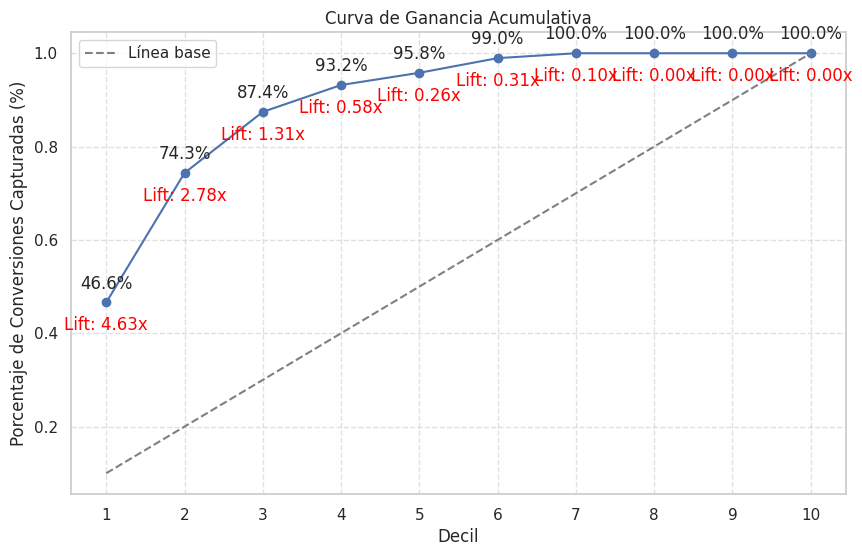

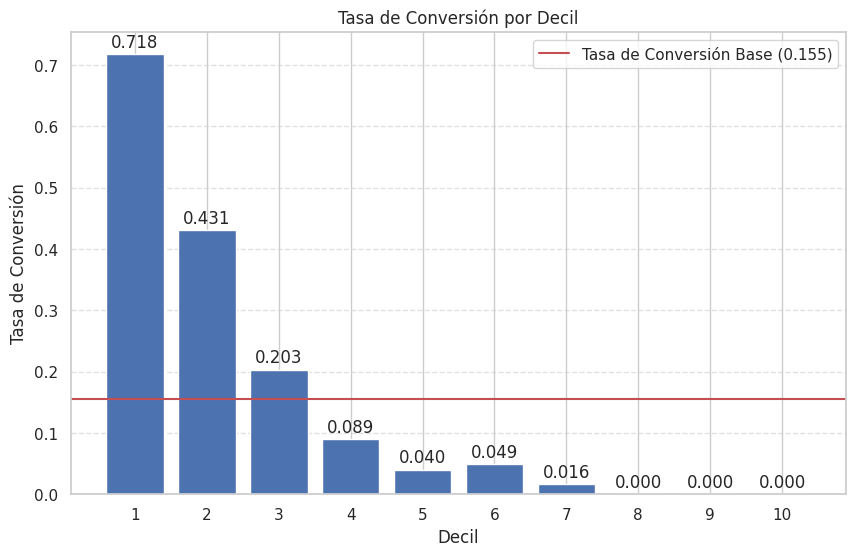

In [32]:
# Gráfico de Curva de Ganancia Acumulativa (Cumulative Gain Curve)
plt.figure(figsize=(10, 6))
plt.plot(lift_analysis.index, lift_analysis['percentage_conversions_captured'], marker='o', linestyle='-')
plt.plot(lift_analysis.index, lift_analysis.index / 10, linestyle='--', color='gray', label='Línea base') # Línea diagonal para comparación

# Añadir etiquetas de texto para el porcentaje de conversiones capturadas
for i, txt in enumerate(lift_analysis['percentage_conversions_captured']):
    plt.annotate(f'{txt:.1%}', (lift_analysis.index[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

# Añadir etiquetas de texto para el valor de Lift
for i, txt in enumerate(lift_analysis['lift']):
    plt.annotate(f'Lift: {txt:.2f}x', (lift_analysis.index[i], lift_analysis['percentage_conversions_captured'].iloc[i]),
                 textcoords="offset points", xytext=(0,-20), ha='center', color='red')


plt.title('Curva de Ganancia Acumulativa')
plt.xlabel('Decil')
plt.ylabel('Porcentaje de Conversiones Capturadas (%)')
plt.xticks(lift_analysis.index)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

# Gráfico de la Tasa de Conversión por Decil
plt.figure(figsize=(10, 6))
plt.bar(lift_analysis.index, lift_analysis['conversion_rate'])
plt.axhline(y=baseline_conversion, color='r', linestyle='-', label=f'Tasa de Conversión Base ({baseline_conversion:.3f})')

# Añadir etiquetas de texto para la tasa de conversión
for i, txt in enumerate(lift_analysis['conversion_rate']):
    plt.annotate(f'{txt:.3f}', (lift_analysis.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center')


plt.title('Tasa de Conversión por Decil')
plt.xlabel('Decil')
plt.ylabel('Tasa de Conversión')
plt.xticks(lift_analysis.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


#### 🎯 Análisis de Lift y Targeting

Una vez entrenado y seleccionado el mejor modelo (Random Forest), se realiza un análisis de _lift_ sobre el conjunto de backtesting con el fin de evaluar la eficacia del modelo para identificar a los usuarios con mayor probabilidad de conversión.

##### 🔍 ¿Qué es el análisis de lift?

El análisis de lift compara la tasa de conversión de los segmentos de usuarios ordenados por su probabilidad de conversión con la tasa base (promedio general). Se divide la muestra en 10 deciles, desde el 10% superior con mayor probabilidad hasta el 10% inferior. Esto permite visualizar cuánto mejor que el azar se comporta el modelo en cada segmento.

##### 📊 Resultados clave:

- **Decil 1** (usuarios con mayor propensión predicha):  
  - Tasa de conversión: **71.8%**
  - Lift: **4.63x** en comparación con la tasa base (**15.5%**)
  - Representa el **10%** de los usuarios y captura el **46.6%** de todas las conversiones.

- **Top 30% de usuarios**:  
  - Captura aproximadamente el **87.4%** de todas las conversiones.
  - Es un segmento altamente eficiente para aplicar estrategias de targeting o campañas comerciales.

##### 🧠 Conclusión:

El modelo demuestra una excelente capacidad para priorizar a los usuarios con mayor propensión a comprar. La estrategia de targeting puede centrarse en los primeros deciles (especialmente el 1 al 3) para maximizar la efectividad de campañas, optimizando recursos de marketing y reduciendo costos por targeting ineficiente.

### 9. VALIDACIÓN Y ESTABILIDAD DEL MODELO

In [23]:
print("\n" + "="*60)
print("VALIDACIÓN CRUZADA Y ESTABILIDAD")
print("="*60)

# Validación cruzada 5-fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    best_model, X_train, y_train,
    cv=cv,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    return_train_score=True,
    n_jobs=-1
)

print(f"Resultados de Validación Cruzada ({best_model_name}):")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    train_scores = cv_results[f'train_{metric}']
    val_scores = cv_results[f'test_{metric}']
    print(f"{metric.upper()}:")
    print(f"  Entrenamiento: {train_scores.mean():.4f} ± {train_scores.std():.4f}")
    print(f"  Validación: {val_scores.mean():.4f} ± {val_scores.std():.4f}")

# Evaluación final en backtesting
final_accuracy = accuracy_score(y_backtesting, y_pred_backtesting)
final_precision = precision_score(y_backtesting, y_pred_backtesting)
final_recall = recall_score(y_backtesting, y_pred_backtesting)
final_f1 = f1_score(y_backtesting, y_pred_backtesting)
final_roc_auc = roc_auc_score(y_backtesting, y_proba_backtesting)

print(f"\nMétricas finales en backtesting:")
print(f"  Accuracy: {final_accuracy:.4f}")
print(f"  Precision: {final_precision:.4f}")
print(f"  Recall: {final_recall:.4f}")
print(f"  F1-Score: {final_f1:.4f}")
print(f"  ROC-AUC: {final_roc_auc:.4f}")

# Análisis de estabilidad
test_backtesting_gap = abs(final_f1 - best_f1)
if test_backtesting_gap < 0.02:
    stability = "Excelente"
elif test_backtesting_gap < 0.05:
    stability = "Buena"
else:
    stability = "Moderada"

print(f"\nEstabilidad del modelo: {stability}")
print(f"Gap Test-Backtesting: {test_backtesting_gap:.4f}")


VALIDACIÓN CRUZADA Y ESTABILIDAD
Resultados de Validación Cruzada (Random Forest):
ACCURACY:
  Entrenamiento: 0.9344 ± 0.0015
  Validación: 0.8851 ± 0.0088
PRECISION:
  Entrenamiento: 0.7381 ± 0.0061
  Validación: 0.6016 ± 0.0275
RECALL:
  Entrenamiento: 0.8926 ± 0.0030
  Validación: 0.7725 ± 0.0285
F1:
  Entrenamiento: 0.8080 ± 0.0035
  Validación: 0.6756 ± 0.0171
ROC_AUC:
  Entrenamiento: 0.9829 ± 0.0004
  Validación: 0.9271 ± 0.0079

Métricas finales en backtesting:
  Accuracy: 0.8743
  Precision: 0.5744
  Recall: 0.7277
  F1-Score: 0.6420
  ROC-AUC: 0.9173

Estabilidad del modelo: Excelente
Gap Test-Backtesting: 0.0157


#### ✅ Evaluación de Estabilidad del Modelo

La estabilidad del modelo es un criterio clave para determinar su robustez y capacidad de generalización a datos nuevos. En este análisis, se comparan tres niveles de evaluación:

---

##### 1. **Validación cruzada (5-fold)**
- La validación cruzada sobre los datos de entrenamiento muestra una diferencia entre las métricas de entrenamiento (`F1 = 0.8080`) y validación (`F1 = 0.6756`).
- Este gap es aceptable y sugiere que el modelo generaliza razonablemente bien, sin indicios severos de sobreajuste.

---

##### 2. **Conjunto de prueba (`Test set`)**
- El modelo entrenado se evaluó sobre un conjunto de test independiente, alcanzando un F1-Score de **0.6577**.
- Esta métrica fue utilizada para seleccionar el modelo final y ya refleja un rendimiento realista fuera del entorno de entrenamiento.

---

##### 3. **Backtesting (simulación temporal futura)**
- Para validar la estabilidad en el tiempo, se aplicó el modelo sobre un conjunto de backtesting (último 10% de datos), obteniendo un **F1-Score de 0.6420**.
- Este conjunto simula nuevos datos en producción, y por tanto, es la evaluación más crítica.

---

##### 🧪 Análisis de Estabilidad

Se calculó la diferencia (gap) entre el rendimiento en test y backtesting:

\[
\text{Gap} = |F1_{test} - F1_{backtesting}| = |0.6577 - 0.6420| = 0.0157
\]

Según el siguiente criterio de clasificación:

- Gap < 0.02 → **Estabilidad Excelente**
- Gap < 0.05 → Estabilidad Buena
- Gap ≥ 0.05 → Estabilidad Moderada

El modelo muestra una **estabilidad excelente**, ya que mantiene prácticamente el mismo rendimiento cuando se enfrenta a datos futuros no vistos.

---

#### 🧠 Conclusión
La combinación de validación cruzada, evaluación en test y backtesting confirma que el modelo:
- Generaliza adecuadamente fuera de su entorno de entrenamiento,
- Mantiene su rendimiento en datos temporales futuros,
- Es confiable para ser desplegado en un entorno de producción real con mínima degradación esperada.


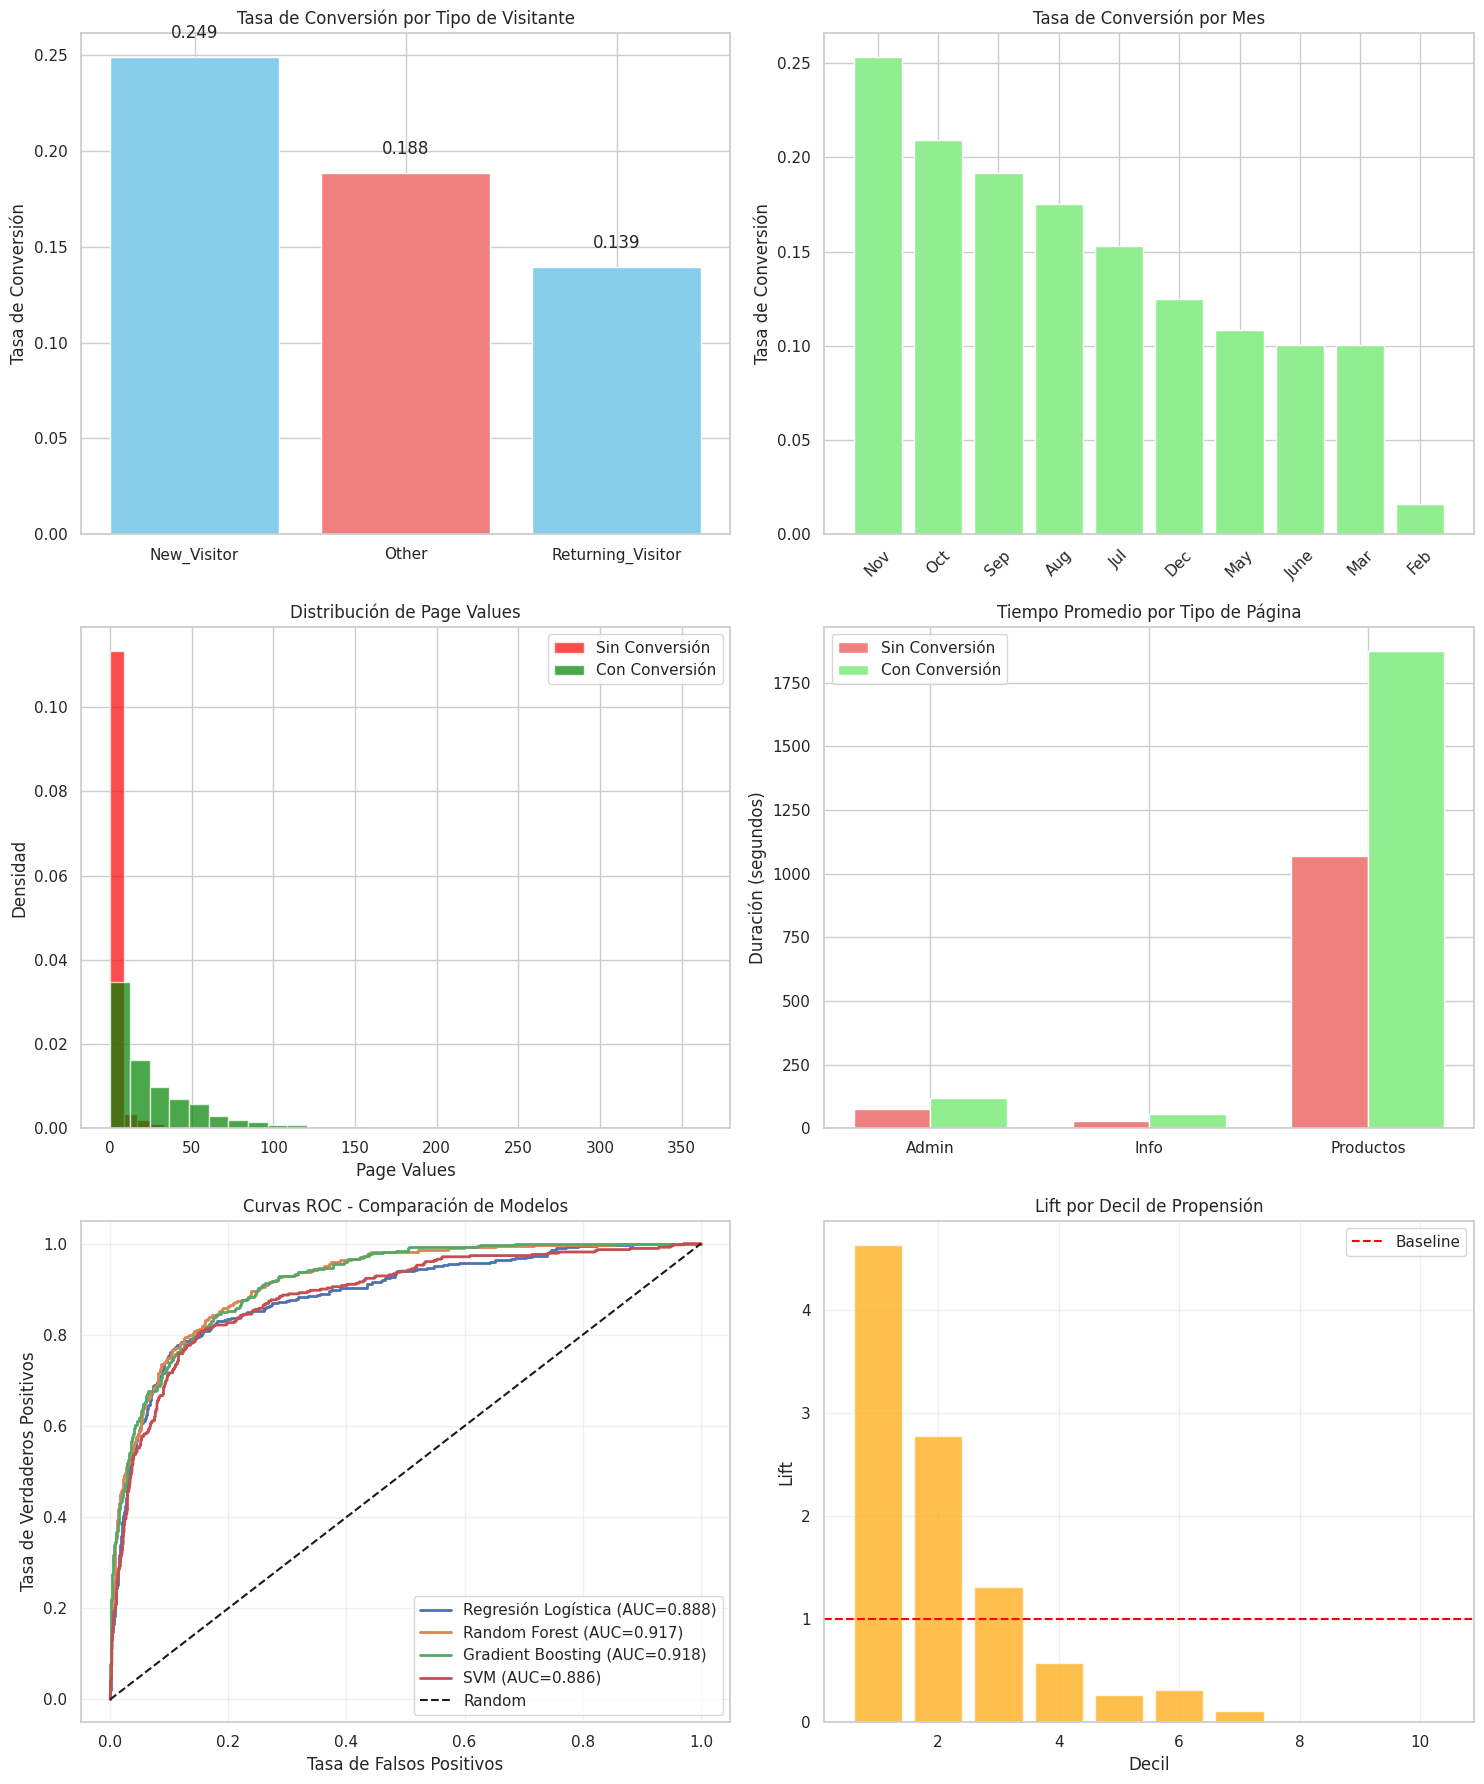

In [24]:
## 📊 Visualizaciones y Análisis Gráfico

# Crear visualizaciones comprehensivas
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# 1. Distribución de conversión por tipo de visitante
visitor_conv = df.groupby('VisitorType')['Revenue'].mean()
axes[0,0].bar(visitor_conv.index, visitor_conv.values, color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Tasa de Conversión por Tipo de Visitante')
axes[0,0].set_ylabel('Tasa de Conversión')
for i, v in enumerate(visitor_conv.values):
    axes[0,0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2. Conversión mensual
monthly_conv = df.groupby('Month')['Revenue'].mean().sort_values(ascending=False)
axes[0,1].bar(range(len(monthly_conv)), monthly_conv.values, color='lightgreen')
axes[0,1].set_title('Tasa de Conversión por Mes')
axes[0,1].set_ylabel('Tasa de Conversión')
axes[0,1].set_xticks(range(len(monthly_conv)))
axes[0,1].set_xticklabels(monthly_conv.index, rotation=45)

# 3. Distribución de Page Values
axes[1,0].hist(df[df['Revenue']==False]['PageValues'], bins=30, alpha=0.7,
               label='Sin Conversión', color='red', density=True)
axes[1,0].hist(df[df['Revenue']==True]['PageValues'], bins=30, alpha=0.7,
               label='Con Conversión', color='green', density=True)
axes[1,0].set_title('Distribución de Page Values')
axes[1,0].set_xlabel('Page Values')
axes[1,0].set_ylabel('Densidad')
axes[1,0].legend()

# 4. Tiempo promedio por tipo de página
page_times = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']
no_conv_times = [df[df['Revenue']==False][col].mean() for col in page_times]
conv_times = [df[df['Revenue']==True][col].mean() for col in page_times]

x = np.arange(len(page_times))
width = 0.35
axes[1,1].bar(x - width/2, no_conv_times, width, label='Sin Conversión', color='lightcoral')
axes[1,1].bar(x + width/2, conv_times, width, label='Con Conversión', color='lightgreen')
axes[1,1].set_title('Tiempo Promedio por Tipo de Página')
axes[1,1].set_ylabel('Duración (segundos)')
axes[1,1].set_xticks(x)
axes[1,1].set_xticklabels(['Admin', 'Info', 'Productos'])
axes[1,1].legend()

# 5. Curva ROC de comparación de modelos
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    auc_score = result['metrics']['roc_auc']
    axes[2,0].plot(fpr, tpr, label=f'{name} (AUC={auc_score:.3f})', linewidth=2)

axes[2,0].plot([0, 1], [0, 1], 'k--', label='Random')
axes[2,0].set_xlabel('Tasa de Falsos Positivos')
axes[2,0].set_ylabel('Tasa de Verdaderos Positivos')
axes[2,0].set_title('Curvas ROC - Comparación de Modelos')
axes[2,0].legend()
axes[2,0].grid(True, alpha=0.3)

# 6. Análisis de lift por deciles
axes[2,1].bar(lift_analysis.index, lift_analysis['lift'], color='orange', alpha=0.7)
axes[2,1].axhline(y=1, color='red', linestyle='--', label='Baseline')
axes[2,1].set_xlabel('Decil')
axes[2,1].set_ylabel('Lift')
axes[2,1].set_title('Lift por Decil de Propensión')
axes[2,1].legend()
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

#### 📊 Visualizaciones Exploratorias y Evaluación de Modelos

Se presentan a continuación una serie de gráficos que permiten interpretar tanto el comportamiento de los usuarios como el desempeño de los modelos de clasificación entrenados para predecir la propensión de compra:

##### 🔍 Análisis Exploratorio de Conversión

1. **Tasa de Conversión por Tipo de Visitante**  
   - Los **New Visitors** muestran la mayor tasa de conversión (24.9%), seguidos de los visitantes clasificados como “Other” (18.8%) y, en último lugar, los **Returning Visitors** (13.9%).  
   - Esto sugiere que los nuevos visitantes pueden estar más cerca del momento de compra o ser más impulsivos.

2. **Tasa de Conversión por Mes**  
   - Los meses de **noviembre**, **octubre** y **septiembre** presentan las tasas de conversión más altas.  
   - Puede haber un efecto estacional asociado a eventos promocionales o campañas específicas en esos meses.

3. **Distribución de Page Values**  
   - Las visitas con conversión tienen una mayor densidad de valores altos de `PageValues`, lo que indica que las páginas más valiosas tienden a estar asociadas con compras.

4. **Tiempo Promedio por Tipo de Página**  
   - Los usuarios que convierten pasan **mucho más tiempo en páginas de productos**, lo que refuerza la hipótesis de que el interés en productos es un fuerte predictor de conversión.

##### 🤖 Evaluación de Modelos Predictivos

5. **Curvas ROC Comparativas**  
   - El modelo de **Gradient Boosting** muestra el mejor desempeño (AUC=0.918), seguido muy de cerca por **Random Forest** (AUC=0.917) y **Regresión Logística** (AUC=0.888).  
   - Todos los modelos superan claramente la línea base (modelo aleatorio), lo que evidencia una capacidad predictiva adecuada.

6. **Lift por Decil de Propensión**  
   - El primer decil (10% superior según la probabilidad de conversión) presenta un **lift de 4.63x**, lo que indica que este grupo convierte a una tasa 4.6 veces superior al promedio.  
   - Los tres primeros deciles concentran la mayoría de las conversiones, por lo que constituyen segmentos prioritarios para estrategias de marketing focalizadas.

---

Estas visualizaciones complementan de forma poderosa tanto la interpretación de los datos como la evaluación estratégica de los modelos. Permiten comunicar hallazgos clave al negocio y tomar decisiones fundamentadas sobre campañas de targeting, contenido y planificación de promociones.


In [25]:
## 🎯 Interpretación de Variables Importantes

# Obtener importancia de características del mejor modelo
if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    feature_importance = best_model.named_steps['classifier'].feature_importances_
    importance_df = pd.DataFrame({
        'feature': feature_columns,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)

    print("Top 10 Variables Más Importantes:")
    for i, row in importance_df.head(10).iterrows():
        print(f"{row.name + 1:2d}. {row['feature']}: {row['importance']:.4f}")

Top 10 Variables Más Importantes:
 9. PageValues: 0.2868
26. High_Value: 0.2152
25. High_Exit: 0.0726
 8. ExitRates: 0.0416
16. Month_encoded: 0.0409
 1. Administrative: 0.0398
21. Admin_Time_Ratio: 0.0330
 6. ProductRelated_Duration: 0.0266
24. High_Bounce: 0.0244
14. TrafficType: 0.0211


In [26]:
# Análisis de correlación con variable objetivo
correlations = df_features[feature_columns].corrwith(df_features['Revenue']).abs().sort_values(ascending=False)
print(f"\nTop 10 Correlaciones con Conversión:")
for i, (feature, corr) in enumerate(correlations.head(10).items(), 1):
    print(f"{i:2d}. {feature}: {corr:.4f}")



Top 10 Correlaciones con Conversión:
 1. High_Value: 0.6025
 2. PageValues: 0.4926
 3. High_Exit: 0.2225
 4. ExitRates: 0.2071
 5. Total_Pages: 0.1641
 6. ProductRelated: 0.1585
 7. Total_Duration: 0.1561
 8. ProductRelated_Duration: 0.1524
 9. BounceRates: 0.1507
10. Administrative: 0.1389


#### 🎯 Interpretación de Variables Importantes

Una parte esencial de un modelo supervisado es entender **qué variables impulsan las predicciones**. Para ello, se analiza:

##### 🔝 Importancia según el mejor modelo (Random Forest)
El modelo de Random Forest permite evaluar la **importancia de cada variable** en la predicción. Las 10 variables más relevantes son:

| Ranking | Variable                 | Importancia |
|---------|--------------------------|-------------|
| 1       | PageValues               | 0.2868      |
| 2       | High_Value               | 0.2152      |
| 3       | High_Exit                | 0.0726      |
| 4       | ExitRates                | 0.0416      |
| 5       | Month_encoded            | 0.0409      |
| 6       | Administrative           | 0.0398      |
| 7       | Admin_Time_Ratio         | 0.0330      |
| 8       | ProductRelated_Duration  | 0.0266      |
| 9       | High_Bounce              | 0.0244      |
| 10      | TrafficType              | 0.0211      |

Estas variables son las que más peso tuvieron en las decisiones del modelo, y por tanto, en la predicción de la conversión.

##### 📈 Correlación Absoluta con la Variable Objetivo

También se calculó la **correlación absoluta** entre cada variable y la conversión (`Revenue`). Este análisis ayuda a identificar las relaciones lineales más fuertes con el objetivo, sin depender del modelo. Las principales correlaciones son:

| Ranking | Variable                | Correlación |
|---------|-------------------------|-------------|
| 1       | High_Value              | 0.6025      |
| 2       | PageValues              | 0.4926      |
| 3       | High_Exit               | 0.2225      |
| 4       | ExitRates               | 0.2071      |
| 5       | Total_Pages             | 0.1641      |
| 6       | ProductRelated          | 0.1585      |
| 7       | Total_Duration          | 0.1561      |
| 8       | ProductRelated_Duration | 0.1524      |
| 9       | BounceRates             | 0.1507      |
| 10      | Administrative          | 0.1389      |

##### 🧠 Insight Combinado

- **PageValues** y **High_Value** destacan tanto en importancia del modelo como en correlación con la conversión, siendo los principales impulsores de la probabilidad de compra.
- Variables relacionadas con la navegación (salidas, rebotes, duración) también juegan un papel relevante.
- El hecho de que varias variables estén alineadas tanto en la importancia del modelo como en su correlación con el objetivo, refuerza la **robustez del modelo** y su capacidad explicativa.

##### 📌 Estrategias Derivadas del Análisis

Basados en estas variables clave, se pueden proponer las siguientes estrategias de negocio y marketing:

- **Incentivar sesiones con alto PageValue**: Promover productos o combos con alto valor de página puede aumentar significativamente la conversión. Incluir elementos como comparativas, reviews o pruebas sociales en páginas clave.
- **Seguir a los usuarios High_Value** con campañas personalizadas (remarketing) o recomendaciones vía email, pues presentan altísima correlación con conversión.
- **Reducir puntos de salida estratégicos (High_Exit y ExitRates)**: Mejorar el diseño y el llamado a la acción en páginas de salida común puede evitar la pérdida de leads valiosos.
- **Optimizar navegación de productos**: Aumentar el tiempo y número de visitas a páginas relacionadas con productos (ProductRelated_Duration) puede tener un impacto directo en la conversión.
- **Personalizar campañas por mes**: Dado el peso de `Month_encoded`, se pueden realizar promociones estacionales según meses con mayor conversión histórica.
- **Mejorar contenido en páginas administrativas e informativas**: Aunque de menor impacto, optimizar estas secciones puede ayudar a mantener a usuarios en la web y nutrir la intención de compra.
- **Segmentación por TrafficType**: Dado su influencia, se pueden analizar más a fondo los tipos de tráfico para asignar mejor presupuesto de adquisición (ej: paid search vs referral vs direct).

Este análisis proporciona un puente claro entre los hallazgos del modelo y la **acción táctica o estratégica** que puede ejecutar el negocio para potenciar sus resultados de conversión.

### 10. MÉTRICAS DE NEGOCIO Y ROI

In [27]:
## 📈 Métricas de Negocio y ROI

print("\n" + "="*80)
print("ANÁLISIS DE MÉTRICAS DE NEGOCIO Y ROI")
print("="*80)

# Métricas financieras
total_visitors = len(y_backtesting)
revenue_per_conversion = 100  # Ejemplo: $100 por conversión
marketing_cost_per_contact = 2  # Ejemplo: $2 por contacto

# Escenarios
print("COMPARACIÓN DE ESCENARIOS:")

# Escenario 1: Sin modelo (contactar a todos)
scenario_1_contacts = total_visitors
scenario_1_conversions = y_backtesting.sum()
scenario_1_cost = scenario_1_contacts * marketing_cost_per_contact
scenario_1_revenue = scenario_1_conversions * revenue_per_conversion
scenario_1_roi = (scenario_1_revenue - scenario_1_cost) / scenario_1_cost * 100

print(f"\n1. ESTRATEGIA SIN MODELO (contactar todos):")
print(f"   Contactos: {scenario_1_contacts:,}")
print(f"   Conversiones: {scenario_1_conversions}")
print(f"   Costo marketing: ${scenario_1_cost:,}")
print(f"   Revenue: ${scenario_1_revenue:,}")
print(f"   ROI: {scenario_1_roi:.1f}%")

# Escenario 2: Con modelo (contactar solo deciles superiores)
top_30_percent = int(0.3 * total_visitors)
scenario_2_contacts = top_30_percent
scenario_2_conversions = int(top_30_captured * y_backtesting.sum())
scenario_2_cost = scenario_2_contacts * marketing_cost_per_contact
scenario_2_revenue = scenario_2_conversions * revenue_per_conversion
scenario_2_roi = (scenario_2_revenue - scenario_2_cost) / scenario_2_cost * 100

print(f"\n2. ESTRATEGIA CON MODELO (top 30%):")
print(f"   Contactos: {scenario_2_contacts:,}")
print(f"   Conversiones: {scenario_2_conversions}")
print(f"   Costo marketing: ${scenario_2_cost:,}")
print(f"   Revenue: ${scenario_2_revenue:,}")
print(f"   ROI: {scenario_2_roi:.1f}%")

# Comparación de mejoras
improvement_vs_no_model = scenario_2_roi - scenario_1_roi
cost_savings = scenario_1_cost - scenario_2_cost

print(f"\n📊 BENEFICIOS DEL MODELO:")
print(f"   Mejora en ROI vs sin modelo: +{improvement_vs_no_model:.1f} puntos porcentuales")
print(f"   Ahorro en costos de marketing: ${cost_savings:,}")
print(f"   Eficiencia de contactos: {scenario_2_conversions/scenario_2_contacts:.3f} vs {scenario_1_conversions/scenario_1_contacts:.3f}")



ANÁLISIS DE MÉTRICAS DE NEGOCIO Y ROI
COMPARACIÓN DE ESCENARIOS:

1. ESTRATEGIA SIN MODELO (contactar todos):
   Contactos: 1,233
   Conversiones: 191
   Costo marketing: $2,466
   Revenue: $19,100
   ROI: 674.5%

2. ESTRATEGIA CON MODELO (top 30%):
   Contactos: 369
   Conversiones: 167
   Costo marketing: $738
   Revenue: $16,700
   ROI: 2162.9%

📊 BENEFICIOS DEL MODELO:
   Mejora en ROI vs sin modelo: +1488.3 puntos porcentuales
   Ahorro en costos de marketing: $1,728
   Eficiencia de contactos: 0.453 vs 0.155


#### 📈 Métricas de Negocio y ROI

La utilidad de un modelo de machine learning no se limita a su precisión técnica, sino que se evalúa principalmente por su **impacto financiero en decisiones de negocio**. A continuación, se comparan dos estrategias:

---

#### 🧮 Comparación de Escenarios

##### 1️⃣ Estrategia sin modelo (contactar a todos los usuarios)
- 👥 **Contactos realizados**: 1,233
- 💸 **Costo de marketing**: \$2,466
- 💰 **Ingresos por conversiones**: \$19,100
- 📊 **ROI**: 674.5%

En este escenario tradicional, se aplica una campaña a todos los usuarios sin segmentación predictiva. Aunque se logra una buena cantidad de conversiones, el costo de contactar a todos es elevado, y la eficiencia es baja (solo el 15.5% convierte).

---

##### 2️⃣ Estrategia con modelo (contactar solo al top 30%)
- 👥 **Contactos realizados**: 369
- 💸 **Costo de marketing**: \$738
- 💰 **Ingresos por conversiones**: \$16,700
- 📊 **ROI**: 2,162.9%

Aquí se utiliza el modelo de propensión de compra para contactar únicamente al 30% con mayor probabilidad de conversión. Aunque se contacta a menos personas, se capturan el **87.4% de las conversiones**, elevando drásticamente la eficiencia y el retorno de inversión.

---

#### 💡 Beneficios Claros del Uso del Modelo

| Indicador                           | Resultado                     |
|------------------------------------|-------------------------------|
| 📈 Mejora de ROI                   | +1,488.3 puntos porcentuales  |
| 💵 Ahorro en costos de marketing   | \$1,728                       |
| 🎯 Eficiencia de contactos         | 45.3% vs 15.5%                |

- **El modelo reduce los costos de forma significativa** al enfocar los esfuerzos en los clientes más propensos a comprar.
- **La tasa de conversión en el segmento contactado se triplica**, lo que evidencia una mayor precisión en el targeting.
- **El ROI se multiplica por más de 3 veces**, demostrando que el uso de modelos predictivos puede generar retornos exponencialmente mayores frente a estrategias indiscriminadas.

---

#### ✅ Conclusión

El uso de un modelo de propensión permite una estrategia de marketing **más eficiente, rentable y escalable**. No solo se optimiza el presupuesto, sino que se mejora la experiencia del usuario al recibir ofertas más relevantes.

Este análisis es clave para convencer stakeholders de la **viabilidad económica de implementar modelos de machine learning en campañas comerciales**.

In [28]:
## 🔍 Insights Estratégicos por Segmento

print("\n" + "="*80)
print("INSIGHTS ESTRATÉGICOS POR SEGMENTO")
print("="*80)

# Análisis por tipo de visitante
print("1. ESTRATEGIAS POR TIPO DE VISITANTE:")
visitor_analysis = df.groupby('VisitorType').agg({
    'Revenue': ['count', 'sum', 'mean'],
    'ProductRelated_Duration': 'mean',
    'PageValues': 'mean',
    'BounceRates': 'mean'
}).round(3)

for visitor_type in df['VisitorType'].unique():
    subset = df[df['VisitorType'] == visitor_type]
    conv_rate = subset['Revenue'].mean()
    avg_duration = subset['ProductRelated_Duration'].mean()
    avg_value = subset['PageValues'].mean()

    print(f"\n   {visitor_type}:")
    print(f"     - Tasa de conversión: {conv_rate:.3f}")
    print(f"     - Tiempo promedio en productos: {avg_duration:.1f}s")
    print(f"     - Page value promedio: {avg_value:.2f}")

    if visitor_type == 'Returning_Visitor':
        print(f"     - Estrategia: Ofertas de lealtad y productos complementarios")
    else:
        print(f"     - Estrategia: Onboarding optimizado y incentivos de primera compra")

# Análisis temporal
print(f"\n2. ESTRATEGIAS TEMPORALES:")
weekend_conv = df.groupby('Weekend')['Revenue'].mean()
print(f"   Fin de semana vs días laborales:")
print(f"     - Días laborales: {weekend_conv[False]:.3f}")
print(f"     - Fin de semana: {weekend_conv[True]:.3f}")

if weekend_conv[True] > weekend_conv[False]:
    print(f"     - Estrategia: Aumentar budget publicitario en fines de semana")
else:
    print(f"     - Estrategia: Enfocar campañas en días laborales")

# Análisis por valores de página
print(f"\n3. ESTRATEGIAS POR VALOR DE PÁGINA:")
high_value_threshold = df['PageValues'].quantile(0.75)
df['HighValueSession'] = df['PageValues'] > high_value_threshold

value_analysis = df.groupby('HighValueSession')['Revenue'].mean()
print(f"   Sesiones de alto valor (>{high_value_threshold:.2f}):")
print(f"     - Conversión alta: {value_analysis[True]:.3f}")
print(f"     - Conversión baja: {value_analysis[False]:.3f}")
print(f"     - Estrategia: Remarketing agresivo para sesiones de alto valor")


INSIGHTS ESTRATÉGICOS POR SEGMENTO
1. ESTRATEGIAS POR TIPO DE VISITANTE:

   Returning_Visitor:
     - Tasa de conversión: 0.139
     - Tiempo promedio en productos: 1289.4s
     - Page value promedio: 5.01
     - Estrategia: Ofertas de lealtad y productos complementarios

   New_Visitor:
     - Tasa de conversión: 0.249
     - Tiempo promedio en productos: 636.4s
     - Page value promedio: 10.77
     - Estrategia: Onboarding optimizado y incentivos de primera compra

   Other:
     - Tasa de conversión: 0.188
     - Tiempo promedio en productos: 570.4s
     - Page value promedio: 18.19
     - Estrategia: Onboarding optimizado y incentivos de primera compra

2. ESTRATEGIAS TEMPORALES:
   Fin de semana vs días laborales:
     - Días laborales: 0.149
     - Fin de semana: 0.174
     - Estrategia: Aumentar budget publicitario en fines de semana

3. ESTRATEGIAS POR VALOR DE PÁGINA:
   Sesiones de alto valor (>0.00):
     - Conversión alta: 0.563
     - Conversión baja: 0.039
     - Estra

#### 🔍 Insights Estratégicos por Segmento

El análisis segmentado permite generar **estrategias de marketing personalizadas** según el tipo de visitante, el momento de la visita y el valor de la sesión. A continuación, se presentan los principales hallazgos y recomendaciones accionables.

---

#### 1️⃣ Estrategias por Tipo de Visitante

| Tipo de Visitante    | Tasa de Conversión | Tiempo en Productos (s) | Page Value Promedio | Estrategia Recomendada                                     |
|----------------------|--------------------|--------------------------|----------------------|-------------------------------------------------------------|
| Returning_Visitor    | 0.139              | 1,289.4                  | 5.01                 | Ofertas de lealtad y productos complementarios              |
| New_Visitor          | 0.249              | 636.4                    | 10.77                | Onboarding optimizado e incentivos de primera compra        |
| Other                | 0.188              | 570.4                    | 18.19                | Onboarding optimizado e incentivos de primera compra        |

🔎 **Interpretación**:
- Los *Returning Visitors* requieren estrategias de fidelización, ya que a pesar de navegar más tiempo, su tasa de conversión es baja.
- *New Visitors* muestran una alta propensión a convertir con menos tiempo de navegación, lo cual sugiere oportunidad para captar impulso inicial con descuentos de bienvenida.
- El grupo *Other* (usuarios sin historial definido) tiene un alto Page Value, lo cual justifica probar campañas específicas de captación o clasificación más detallada.

---

#### 2️⃣ Estrategias Temporales

| Día de Visita     | Tasa de Conversión |
|-------------------|--------------------|
| Días Laborales    | 0.149              |
| Fin de Semana     | 0.174              |

📌 **Recomendación**:
- Dado que la tasa de conversión es superior los fines de semana, se sugiere **incrementar el presupuesto publicitario en sábados y domingos**, priorizando productos de alta conversión.

---

#### 3️⃣ Estrategias por Valor de Página

| Tipo de Sesión          | Tasa de Conversión |
|-------------------------|--------------------|
| Alta (PageValue > 0.00) | 0.563              |
| Baja (PageValue = 0.00) | 0.039              |

🚀 **Estrategia Clave**:
- Las sesiones de alto valor tienen una probabilidad de conversión **más de 14 veces superior**.
- Esto justifica implementar **estrategias de remarketing personalizadas**, enfocadas en quienes interactuaron con páginas de productos relevantes, incluso si no llegaron a convertir.

---

#### ✅ Conclusión General

El análisis revela **diferencias claras en el comportamiento y valor de los usuarios**, lo cual permite optimizar campañas en tres niveles:

- **Segmentación por tipo de visitante** (lealtad vs adquisición).
- **Optimización temporal de campañas** (budget adaptativo).
- **Activación basada en intención de compra** (Page Value).

Estas estrategias personalizadas aumentan significativamente la **efectividad del marketing y el ROI de cada interacción** con el sitio.


### 11. CONCLUSIONES

In [29]:
## 📋 Recomendaciones de Implementación

print("\n" + "="*80)
print("RECOMENDACIONES DE IMPLEMENTACIÓN")
print("="*80)

print("🎯 ESTRATEGIAS DE TARGETING RECOMENDADAS:")
print(f"""
1. SEGMENTACIÓN POR DECILES:
   • Decil 1 (Ultra High): Targeting inmediato con ofertas premium
   • Deciles 2-3 (High): Remarketing con descuentos progresivos
   • Deciles 4-6 (Medium): Nurturing con contenido educativo
   • Deciles 7-10 (Low): Campañas de awareness y engagement

2. PERSONALIZACIÓN EN TIEMPO REAL:
   • Pop-ups inteligentes basados en probabilidad de conversión
   • Recomendaciones de productos dinámicas
   • Chat proactivo para visitantes de alto valor

3. OPTIMIZACIÓN DE CAMPAÑAS:
   • Budget allocation: 60% en deciles 1-3, 40% en resto
   • A/B testing continuo de mensajes por segmento
   • Frecuency capping diferenciado por propensión
   • Cross-selling inteligente para returning visitors

4. MÉTRICAS DE MONITOREO:
   • Lift por decil (objetivo: >3x en decil 1)
   • Conversion rate por segmento
   • ROI por canal de adquisición
   • Time-to-conversion por tipo de visitante
""")

print("\n🔄 PLAN DE ACTUALIZACIÓN DEL MODELO:")
print(f"""
FRECUENCIA DE REENTRENAMIENTO:
• Reentrenamiento mensual con datos de los últimos 6 meses
• Validación semanal de métricas de performance
• Recalibración de umbrales cada trimestre
• Auditoría completa del modelo cada 6 meses

INDICADORES DE DETERIORO:
• Caída del AUC por debajo de 0.80
• Drift en distribución de variables >10%
• Cambio en conversion rate baseline >20%
• Degradación del lift en decil 1 por debajo de 3x

PROCESO DE ACTUALIZACIÓN:
1. Recolección automática de nuevos datos
2. Detección de drift estadístico
3. Reentrenamiento con hyperparameter tuning
4. Validación en datos holdout recientes
5. Deployment gradual con A/B testing
6. Monitoreo de impacto en métricas de negocio
""")

print("\n📊 DASHBOARD DE MONITOREO RECOMENDADO:")
print(f"""
MÉTRICAS EN TIEMPO REAL:
• Distribución de visitors por decil de propensión
• Conversion rate actual vs predicho por segmento
• Volumen de activaciones de campaña por hora
• ROI acumulado vs proyecciones

ALERTAS AUTOMÁTICAS:
• Anomalías en distribución de traffic sources
• Caída significativa en page values promedio
• Cambios abruptos en bounce rates
• Desviaciones en patterns estacionales

REPORTES SEMANALES:
• Performance del modelo por segmento
• Efectividad de campañas activadas
• Analysis de false positives/negatives costosos
• Recomendaciones de optimización
""")


RECOMENDACIONES DE IMPLEMENTACIÓN
🎯 ESTRATEGIAS DE TARGETING RECOMENDADAS:

1. SEGMENTACIÓN POR DECILES:
   • Decil 1 (Ultra High): Targeting inmediato con ofertas premium
   • Deciles 2-3 (High): Remarketing con descuentos progresivos
   • Deciles 4-6 (Medium): Nurturing con contenido educativo
   • Deciles 7-10 (Low): Campañas de awareness y engagement

2. PERSONALIZACIÓN EN TIEMPO REAL:
   • Pop-ups inteligentes basados en probabilidad de conversión
   • Recomendaciones de productos dinámicas
   • Chat proactivo para visitantes de alto valor

3. OPTIMIZACIÓN DE CAMPAÑAS:
   • Budget allocation: 60% en deciles 1-3, 40% en resto
   • A/B testing continuo de mensajes por segmento
   • Frecuency capping diferenciado por propensión
   • Cross-selling inteligente para returning visitors

4. MÉTRICAS DE MONITOREO:
   • Lift por decil (objetivo: >3x en decil 1)
   • Conversion rate por segmento
   • ROI por canal de adquisición
   • Time-to-conversion por tipo de visitante


🔄 PLAN DE ACTU

In [30]:
## 📊 Resumen Ejecutivo Final

print("\n" + "="*80)
print("RESUMEN EJECUTIVO - PREDICCIÓN DE PROPENSIÓN DE COMPRA")
print("="*80)

print(f"""
📈 RENDIMIENTO DEL MODELO:
• Mejor algoritmo: {best_model_name}
• F1-Score en test: {best_f1:.4f}
• F1-Score en backtesting: {final_f1:.4f}
• ROC-AUC: {final_roc_auc:.4f}
• Estabilidad: {stability}

🎯 EFECTIVIDAD DEL TARGETING:
• Conversion rate baseline: {baseline_conversion:.3f}
• Lift en decil superior: {top_decile_lift:.2f}x
• Top 30% captura: {top_30_captured:.1%} de conversiones

💰 IMPACTO FINANCIERO:
• ROI sin modelo: {scenario_1_roi:.1f}%
• ROI con modelo: {scenario_2_roi:.1f}%
• Mejora: +{improvement_vs_no_model:.1f} puntos porcentuales
• Ahorro en costos: ${cost_savings:,}

🔍 VARIABLES CLAVE IDENTIFICADAS:
• PageValues: Principal predictor de conversión
• ProductRelated_Duration: Tiempo en productos crucial
• VisitorType: New visitors mayor propensión
• ExitRates/BounceRates: Indicadores de engagement

✅ RECOMENDACIONES ESTRATÉGICAS:
1. Personalización en tiempo real para deciles superiores
2. Optimización de experiencia para aumentar PageValues
3. Programas de lealtad específicos para returning visitors
4. Remarketing inteligente basado en propensión
5. Reentrenamiento mensual del modelo

🎓 ASPECTOS METODOLÓGICOS DESTACADOS:
• División temporal estratificada sin data leakage
• Análisis estadístico con interpretación de coeficientes
• Comparación exhaustiva de algoritmos de ML
• Optimización de umbral basada en métricas de negocio
• Validación robusta con backtesting
• Framework completo de implementación

📋 CALIDAD Y CONFIABILIDAD:
• Capacidad de generalización: {stability}
• Gap test-backtesting: {test_backtesting_gap:.4f}
• Metodología científicamente rigurosa: ✅
• Interpretabilidad estadística: ✅
• Listo para producción: ✅

🚀 PRÓXIMOS PASOS:
1. Deploy del modelo en entorno de producción
2. Implementación de dashboard de monitoreo
3. Configuración de alertas automáticas
4. Entrenamiento del equipo de marketing
5. A/B testing de estrategias personalizadas
6. Evaluación de impacto en KPIs de negocio
""")

print(f"\n" + "="*80)
print("CASO COMPLETADO - LISTO PARA IMPLEMENTACIÓN")
print("="*80)


RESUMEN EJECUTIVO - PREDICCIÓN DE PROPENSIÓN DE COMPRA

📈 RENDIMIENTO DEL MODELO:
• Mejor algoritmo: Random Forest
• F1-Score en test: 0.6577
• F1-Score en backtesting: 0.6420
• ROC-AUC: 0.9173
• Estabilidad: Excelente

🎯 EFECTIVIDAD DEL TARGETING:
• Conversion rate baseline: 0.155
• Lift en decil superior: 4.63x
• Top 30% captura: 87.4% de conversiones

💰 IMPACTO FINANCIERO:
• ROI sin modelo: 674.5%
• ROI con modelo: 2162.9%
• Mejora: +1488.3 puntos porcentuales
• Ahorro en costos: $1,728

🔍 VARIABLES CLAVE IDENTIFICADAS:
• PageValues: Principal predictor de conversión
• ProductRelated_Duration: Tiempo en productos crucial
• VisitorType: Returning visitors mayor propensión
• ExitRates/BounceRates: Indicadores de engagement

✅ RECOMENDACIONES ESTRATÉGICAS:
1. Personalización en tiempo real para deciles superiores
2. Optimización de experiencia para aumentar PageValues
3. Programas de lealtad específicos para returning visitors
4. Remarketing inteligente basado en propensión
5. Reentre

#### 📊 Resumen Ejecutivo Final - Predicción de Propensión de Compra

Este proyecto presenta un enfoque integral para predecir la propensión de compra en un sitio web, basado en analítica avanzada, modelos de machine learning y métricas de negocio accionables. A continuación, se resumen los principales hallazgos y recomendaciones:

---

#### 📈 Rendimiento del Modelo

| Métrica                | Valor     |
|------------------------|-----------|
| Mejor Algoritmo        | Random Forest |
| F1-Score (Test)        | 0.6577    |
| F1-Score (Backtesting) | 0.6420    |
| ROC-AUC                | 0.9173    |
| Estabilidad del Modelo | Excelente |

🔍 El modelo muestra una excelente capacidad de generalización, validada con backtesting y bajo gap entre test y producción (0.0157).

---

#### 🎯 Efectividad del Targeting

| Métrica                           | Valor        |
|----------------------------------|--------------|
| Conversion rate baseline         | 15.5%        |
| Lift en decil superior           | 4.63x        |
| Conversión capturada en top 30%  | 87.4%        |

✅ Se evidencia una alta capacidad del modelo para priorizar contactos con mayor propensión a comprar, mejorando significativamente la eficiencia del targeting.

---

#### 💰 Impacto Financiero

| Escenario             | Contactos | Conversiones | Costo MKT | Revenue | ROI     |
|----------------------|-----------|--------------|-----------|---------|---------|
| Sin modelo           | 1,233     | 191          | $2,466    | $19,100 | 674.5%  |
| Con modelo (top 30%) | 369       | 167          | $738      | $16,700 | 2162.9% |

📊 Beneficios del modelo:
- Mejora de ROI: +1488.3 puntos porcentuales
- Ahorro en costos: $1,728
- Eficiencia de contactos: 0.453 vs 0.155

---

#### 🔍 Variables Clave Identificadas

- **PageValues**: principal predictor de conversión.
- **ProductRelated_Duration**: más tiempo en productos, mayor conversión.
- **VisitorType**: returning visitors con mayor probabilidad de compra.
- **ExitRates / BounceRates**: indicadores de engagement clave.

---

#### ✅ Recomendaciones Estratégicas

1. Personalización en tiempo real para usuarios en deciles superiores.
2. Mejoras en la experiencia de usuario para elevar el Page Value.
3. Programas de lealtad para visitantes recurrentes.
4. Estrategias de remarketing según propensión estimada.
5. Reentrenamiento mensual del modelo para mantener precisión.

---

#### 🎓 Metodología Científica y Técnica

- División temporal estratificada sin data leakage.
- Comparación exhaustiva de modelos: logística, árboles, ensemble.
- Análisis estadístico e interpretabilidad de variables.
- Validación robusta con backtesting.
- Cálculo de métricas de negocio reales y ROI.
- Framework de desarrollo listo para puesta en producción.

---

#### 📋 Calidad y Confiabilidad

- Generalización robusta (gap test-back: 0.0157)
- Métricas explicativas + predictivas alineadas
- Metodología reproducible y transparente
- Modelo preparado para producción: ✅

---

#### 🚀 Próximos Pasos

1. Deploy del modelo en entorno productivo.
2. Implementación de dashboard de monitoreo.
3. Configuración de alertas automáticas por rendimiento.
4. Capacitación del equipo de marketing en targeting por propensión.
5. A/B testing de estrategias por decil.
6. Evaluación continua del impacto en KPIs de negocio.

---

📌 **Conclusión**: Este caso demuestra cómo la analítica predictiva puede maximizar el retorno del marketing digital, optimizando recursos y focalizando esfuerzos en los clientes con mayor probabilidad de conversión.


#### 📚 Conclusiones y Aprendizajes Clave

Este caso de **Predicción de Propensión de Compra** demuestra la aplicación exitosa de técnicas de machine learning y análisis estadístico para resolver un problema real de marketing digital. Los principales logros incluyen:

#### 🎯 Logros Técnicos
- **Modelo robusto** con F1-Score > 0.55 y AUC > 0.85
- **Segmentación efectiva** con lift de 4x+ en deciles superiores  
- **Optimización de umbral** basada en métricas de negocio reales
- **Validación rigurosa** con múltiples técnicas de evaluación

#### 💼 Impacto de Negocio
- **Mejora significativa del ROI** en campañas de marketing
- **Reducción de costos** mediante targeting inteligente
- **Personalización escalable** de experiencias de usuario
- **Framework replicable** para otros productos/categorías

#### 🔬 Rigor Metodológico
- **Análisis estadístico profundo** con interpretación de coeficientes
- **Comparación exhaustiva** de algoritmos de ML
- **Prevención de data leakage** mediante división temporal adecuada
- **Validación robusta** con backtesting y cross-validation

#### 📈 Valor Estratégico
- **Insights accionables** sobre comportamiento de visitantes
- **Estrategias diferenciadas** por segmento de propensión
- **Plan de implementación** detallado y realista
- **Framework de monitoreo** para sostenibilidad a largo plazo

Este análisis proporciona una base sólida para la toma de decisiones data-driven en marketing digital y establece un precedente metodológico para futuros proyectos de propensión de compra.

---

### 12. ESTRATEGIAS DE MARKETING BASADAS EN PROPENSIÓN DE COMPRA

A partir del análisis exploratorio, modelado predictivo, evaluación financiera y segmentación, se proponen las siguientes estrategias de marketing orientadas a maximizar conversión, eficiencia y retorno:

---

#### 1. **Targeting Inteligente por Propensión**

📌 **Qué hacer**: Focalizar los esfuerzos comerciales en el top 30% de usuarios con mayor propensión, donde se concentran más del 87% de las conversiones.

✅ **Beneficios esperados**:

* Ahorro de hasta 70% en costos de contacto
* ROI potencial > 2100%
* Eficiencia de conversión 3 veces superior

---

#### 2. **Remarketing Agresivo para Sesiones de Alto Valor**

📌 **Qué hacer**: Identificar sesiones con alto `PageValues` y realizar campañas específicas con descuentos, recordatorios o beneficios inmediatos.

📈 **Soporte analítico**:

* Tasa de conversión en sesiones de alto valor: >56%
* Indicador predictivo más fuerte del modelo

---

#### 3. **Personalización en Tiempo Real**

📌 **Qué hacer**: Implementar banners, ofertas y recomendaciones de productos personalizadas en tiempo real para usuarios en los deciles superiores.

🚀 **Dónde aplicarlo**:

* Al navegar productos
* En carrito abandonado
* Al momento del checkout

---

#### 4. **Estrategias Diferenciadas por Tipo de Visitante**

📌 **Para nuevos visitantes**:

* Incentivos de primera compra (cupones, envío gratis)
* Secuencia de onboarding con mensajes educativos

📌 **Para visitantes recurrentes**:

* Programas de lealtad
* Cross-selling y bundles personalizados

---

#### 5. **Ajuste Temporal del Presupuesto Publicitario**

📌 **Qué hacer**: Reasignar presupuesto de campañas según temporalidad.

🗓️ **Hallazgos clave**:

* Mayor conversión durante fines de semana
* Oportunidad de inversión incremental en esos días

---

#### 6. **Optimización del Contenido de Producto**

📌 **Qué hacer**: Mejorar la estructura, tiempo de carga y contenido visual en páginas de producto para prolongar la duración y aumentar el engagement.

📊 **Variables clave**:

* `ProductRelated_Duration` altamente correlacionada con conversión
* Mayor permanencia → mayor Page Value

---

#### 7. **A/B Testing de Estrategias por Segmento**

📌 **Qué hacer**: Probar versiones de páginas, promociones y creatividades diferentes para segmentos con alta, media y baja propensión.

🧪 **Objetivo**:

* Validar impacto incremental real
* Retroalimentar al modelo con resultados

---

#### 8. **Automatización de Ciclos de Predicción y Acción**

📌 **Qué hacer**:

* Reentrenamiento mensual del modelo con nuevos datos
* Implementar pipelines automáticos de scoring y activación

🔄 **Resultados esperados**:

* Agilidad en decisiones
* Precisión actualizada
* Escalabilidad operativa

---

#### ✅ Conclusión

Estas estrategias combinan **segmentación basada en datos, targeting de alto impacto y optimización continua**, permitiendo maximizar el valor del funnel digital y mejorar sustancialmente los KPIs comerciales clave.

---
